# Roulette Game

## Import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
import seaborn as sns
from sklearn import linear_model
import math
from scipy.stats import gaussian_kde
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression

import tikzplotlib

In [2]:
df_raw = pd.read_csv('./logRoulette_150ppl.txt', sep='ERROR', names=['Date','remaining'])

<ipython-input-2-ed6e68f530b6>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_raw = pd.read_csv('./logRoulette_150ppl.txt', sep='ERROR', names=['Date','remaining'])


In [3]:
df_raw.head()

Date                                  remaining
0  2020-04-29 18:25:20:v -     --> 1bd9c690_Event_Welcome_StartWelcome
1  2020-04-29 18:31:44:v -     --> 18a9c810_Event_Welcome_StartWelcome
2  2020-04-29 18:31:45:v -    --> 18a9c810_Event_Welcome_FinishWelcome
3  2020-04-29 18:31:46:v -      --> 18a9c810_Event_Info_FinishConsent1
4  2020-04-29 21:50:39:v -     --> 5bc9f6af_Event_Welcome_StartWelcome

In [4]:
# 
df_all = pd.DataFrame(df_raw.Date)
df_remaining = pd.DataFrame(df_raw.remaining.str.split('_',1).tolist(),
                                   columns = ['Usr_Name','Data'])
df_all['Usr_Name']=df_remaining.Usr_Name
df_all['Data']=df_remaining.Data
df_all.head()

Date       Usr_Name                         Data
0  2020-04-29 18:25:20:v -    --> 1bd9c690   Event_Welcome_StartWelcome
1  2020-04-29 18:31:44:v -    --> 18a9c810   Event_Welcome_StartWelcome
2  2020-04-29 18:31:45:v -    --> 18a9c810  Event_Welcome_FinishWelcome
3  2020-04-29 18:31:46:v -    --> 18a9c810    Event_Info_FinishConsent1
4  2020-04-29 21:50:39:v -    --> 5bc9f6af   Event_Welcome_StartWelcome

## Find qualifying players
Only keep players that finish the game, and discard other data

In [5]:
df_all['Usr_Name'] = df_all['Usr_Name'].apply(lambda x : x[5:])
df_all.Date = df_all.Date.apply(lambda x : x[:-5])
df_all.head()

Date  Usr_Name                         Data
0  2020-04-29 18:25:20  1bd9c690   Event_Welcome_StartWelcome
1  2020-04-29 18:31:44  18a9c810   Event_Welcome_StartWelcome
2  2020-04-29 18:31:45  18a9c810  Event_Welcome_FinishWelcome
3  2020-04-29 18:31:46  18a9c810    Event_Info_FinishConsent1
4  2020-04-29 21:50:39  5bc9f6af   Event_Welcome_StartWelcome

In [6]:
alldate = df_all["Date"].str.split("-", n = 3, expand = True)
df_all['month'] = alldate[1]
df_all['day'] = alldate[2].str.split(" ", n=2, expand=True)[0]


In [7]:
df_all = df_all[(df_all['month']=="05") | (df_all['month']=="11")]
df_all = df_all[(df_all['day'] == "23") | (df_all['day'] == "05") | (df_all['day'] == '26')]


In [8]:
Qual_name = df_all.groupby(['Usr_Name'])['Data'].last()

In [9]:
#Qual_users=Qual_name[Qual_name.str.contains("FinishGame") | Qual_name.str.contains('Data_RouletteData')].index.values.tolist()
Qual_users=Qual_name[Qual_name.str.contains("Roulette_trials_30")].index.values.tolist()
Qual_users2 = Qual_name[Qual_name.str.contains("Roulette_practiceTrials_5")].index.values.tolist()
Qual_users3 = Qual_name[Qual_name.str.contains("Roulette_FinishGame")].index.values.tolist()
Qual_users4 = Qual_name[Qual_name.str.contains("Completion_Link")].index.values.tolist()
# Qual_users = Qual_users4
Qual_users = Qual_users+Qual_users2+Qual_users3+Qual_users4
num_qual = len(Qual_users)
print(len(Qual_users))
Qual_users

155


['daa26e48',
 '31b26f3a',
 '13b26f34',
 '1ad26f71',
 '22f27097',
 '26f2702d',
 '2de26fa1',
 '34d26f39',
 '36e26f9e',
 '36e2702e',
 '3beb5283',
 '3da26f93',
 '3ea1c672',
 '3eb26f4b',
 '3fb26e90',
 '43b26da8',
 '4af27399',
 '4da26ec9',
 '4ed26ded',
 '53f2e9bc',
 '57b26e42',
 '5af26fbd',
 '60c2716a',
 '63bb53a2',
 '65e26ed3',
 '67d26e6a',
 '67d2e9c4',
 '6dd26eee',
 '75b2703a',
 '79c27175',
 '88cb528e',
 '8ae26f0e',
 '8dbb5282',
 '8deb5261',
 '92e26f24',
 '94c26e7e',
 '95a26f05',
 '97c2e8eb',
 'a0f26ee7',
 'a1c26f79',
 'a2db5281',
 'a5f26ea6',
 'a7a26eb7',
 'aae26e58',
 'ada273b5',
 'b0c26ec8',
 'b1a2e8b7',
 'bce26dbc',
 'bdf26ebe',
 'ccc26e82',
 'd0e26f70',
 'd6a1c664',
 'd6b2eb39',
 'd7a26e45',
 'd7c26e6b',
 'd7f26f64',
 'dba26e1d',
 'dcf26f0b',
 'dda26f4d',
 'dfd2e9e2',
 'e0f26ed7',
 'e1f2e994',
 'eaeb5264',
 'f8c26f28',
 '15ab529f',
 '15e2fc89',
 '16b2e905',
 '17cb526f',
 '18c2e89e',
 '19f2e8ca',
 '1bb2e8e8',
 '1da2e993',
 '1eb2e891',
 '20ab5270',
 '20c2e914',
 '25a2e9af',
 '2cbb53c7',

Invalid users are: 
3ea1c672
d6a1c664
3da26f93
b0c26ec8

In [10]:
Qual_users.remove('3ea1c672')#Incomplete dataset
Qual_users.remove('d6a1c664')#Incomplete dataset
Qual_users.remove('3da26f93')#Incomplete dataset
Qual_users.remove('b0c26ec8')#Incomplete dataset
Qual_users.remove('dea2e9b0')#Incomplete dataset (missing 1 speed trial)
Qual_users.remove('2de26fa1')#Disqualified
Qual_users.remove('6dd26eee')#Disqualified

Qual_users.remove('78cb5376')#Incomplete dataset from 23 May
Qual_users.remove('2cbb53c7')#Poor Roulette performance
Qual_users.remove('67d26e6a')#Poor Roulette performance
Qual_users.remove('88cb528e')#Poor Roulette performance

Qual_users.remove('2ed2e4b1')#Test user Age 999
num_qual = len(Qual_users)
len(Qual_users)

143

In [11]:
df_all2=df_all[df_all['Usr_Name'].isin(Qual_users)].reset_index()
print(df_all2.shape)
df_all2.tail()

(47755, 6)


index                 Date  Usr_Name  \
47750  53020  2020-11-26 19:23:37  15e2fc89   
47751  53021  2020-11-26 19:23:42  15e2fc89   
47752  53022  2020-11-26 19:23:42  15e2fc89   
47753  53023  2020-11-26 19:23:42  15e2fc89   
47754  53024  2020-11-26 19:23:44  15e2fc89   

                                                    Data month day  
47750  Data_RouletteData_2.7031,2.5868,6.5833,-0.3789...    11  26  
47751                     Data_Roulette_practiceTrials_5    11  26  
47752                            Data_Roulette_trials_30    11  26  
47753                          Event_Roulette_FinishGame    11  26  
47754                     Event_Roulette_Completion_Link    11  26

## Some preprocessing

#### Get data and event separately

In [12]:
df_splitdat = pd.DataFrame(df_all2.Data.str.split('_',1).tolist(),
                                   columns = ['EventType','Data'])
df_datonly = df_all2[['Date','Usr_Name']]
df_datonly['EventType']=df_splitdat.EventType
df_datonly['Data']=df_splitdat.Data
df_datonly = df_datonly[df_datonly.EventType.isin(['Data'])]

<ipython-input-12-a91c6768fba7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_datonly['EventType']=df_splitdat.EventType
<ipython-input-12-a91c6768fba7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_datonly['Data']=df_splitdat.Data


#### Get user info

In [13]:
df_splitdat = pd.DataFrame(df_all2.Data.str.split('_',1).tolist(),
                                   columns = ['EventType','Data'])
df_info = df_all2[['Usr_Name']]
df_info['EventType']=df_splitdat.EventType
df_info['Data']=df_splitdat.Data
df_info = df_info[df_info.EventType.isin(['Info'])]
df_infosplit = pd.DataFrame(df_info.Data.str.split('_',1).tolist(),columns = ['InfoType','InfoData'])
df_info = df_info.reset_index()[['Usr_Name']]
df_info['InfoType'] =df_infosplit.InfoType
df_info['InfoData'] =df_infosplit.InfoData

<ipython-input-13-f98fe84b79de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info['EventType']=df_splitdat.EventType
<ipython-input-13-f98fe84b79de>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info['Data']=df_splitdat.Data


#### Split the data into type and values

In [14]:
df_splitdat = pd.DataFrame(df_datonly.Data.str.split('_',1).tolist(),
                                   columns = ['DataName','Data'])

df_datonly2 = df_datonly[['Date','Usr_Name']].reset_index()
df_datonly2 = df_datonly2[['Date','Usr_Name']]
df_datonly2['DataType']=df_splitdat['DataName']
df_datonly2['Data']=df_splitdat['Data']

df_datonly2.head()

Date  Usr_Name     DataType  \
0  2020-05-05 13:45:01  bce26dbc  Calibration   
1  2020-05-05 13:45:23  43b26da8  Calibration   
2  2020-05-05 13:45:56  bce26dbc    AngleData   
3  2020-05-05 13:46:06  43b26da8    AngleData   
4  2020-05-05 13:46:18  43b26da8    AngleData   

                                                Data  
0                                                344  
1                                                380  
2  3.2523,1.7433146928204142,1.1875146928204137,5...  
3  3.2523,1.7433146928204142,1.1875146928204137,1...  
4  3.6579,5.9222,2.0519146928204144,5.67858671708...

## Calculate the best betting time

In [15]:
from scipy.special import comb
def reward(decayrate,deltathetasq,rhosq,tauR,t):
    sigma_f = (deltathetasq)/(t/(2*tauR)-rhosq*np.tanh(t/(2*tauR)))
    sum_arr = [comb(10,5-n)*np.exp(-0.5*(n**2)*(sigma_f**2)) for n in np.arange(5)+1]
    rwd=1000*(decayrate**(-t))*(2**(-10))*(comb(10,5)+2*(np.sum(sum_arr)))
    return rwd

In [16]:
def best_betting_time(decayrate,deltathetasq,rhosq,tauR):
    x=np.arange(0.00001,5,0.01)
    allrwd=[reward(decayrate,deltathetasq,rhosq,tauR,t) for t in x]
    best_t=x[allrwd.index(max(allrwd))]
    return best_t

## Split data for a given user

In [17]:
def gen_alldata_of_user(username):
    dfs={};
    # Generate Data for one user
    df_userdata=df_datonly2[df_datonly2['Usr_Name'].isin([username])]
    
    
    ### Angle Data
    df_angledata=df_userdata[df_userdata['DataType'].isin(['AngleData'])]
    df_anglesplit = pd.DataFrame(df_angledata.Data.str.split(',').tolist(),
                                       columns = ['ballinit','cursorinit','ballfinal','cursorfinal','time'])
    df_anglesplit['angleinit'] = pd.Series.mod(df_anglesplit.ballinit.astype(float) - df_anglesplit.cursorinit.astype(float),2*np.pi)
    df_anglesplit['angleinit2'] = np.pi*2-df_anglesplit['angleinit']
    df_anglesplit['angleinit'] = pd.DataFrame.min(df_anglesplit[['angleinit','angleinit2']],axis=1)
    df_anglesplit.drop(columns='angleinit2',inplace=True)
    df_anglesplit['anglefinal'] = pd.Series.mod(df_anglesplit.ballfinal.astype(float) - df_anglesplit.cursorfinal.astype(float),2*np.pi)
    df_anglesplit['anglefinal2'] = np.pi*2-df_anglesplit['anglefinal']
    df_anglesplit['anglefinal'] = pd.DataFrame.min(df_anglesplit[['anglefinal','anglefinal2']],axis=1)
    df_anglesplit.drop(columns='anglefinal2',inplace=True)
    df_anglesplit['angleerror'] = df_anglesplit['anglefinal']-df_anglesplit['angleinit']
    df_anglesplit['angleerrorabs'] = abs(df_anglesplit['angleerror'])
    df_anglesplit['angleerrorvar'] = df_anglesplit['angleerror'].var()
    df_anglesplit['angleerrormedian'] = df_anglesplit['angleerrorabs'].median()
    df_anglesplit['angleerrormean'] = df_anglesplit['angleerrorabs'].mean()
    df_anglesplit['numtrial'] = df_anglesplit.index
    df_anglesplit['username'] = username
    angle_displaytime=2.
    # DthetaM = sigma_theta^2 tauM = sigma_theta * time
    df_anglesplit['DthetaM'] = pd.DataFrame.abs(df_anglesplit.angleerror).var()*angle_displaytime #Change! the time (2 here) #
    
    
    ### Speed
    speed_displaytime=3.
    df_speeddata=df_userdata[df_userdata['DataType'].isin(['SpeedData'])]
    df_speedsplit = pd.DataFrame(df_speeddata.Data.str.split(',').tolist(),
                                   columns = ['omegainit','omegafinal','time'],dtype=float)
    df_speedsplit['speederror'] = abs(df_speedsplit['omegafinal'].astype(float))-abs(df_speedsplit['omegainit'].astype(float))
    df_speedsplit['speederrorabs'] = abs(df_speedsplit['speederror'])
    df_speedsplit['speederrorsq'] = df_speedsplit['speederror'] * df_speedsplit['speederror']
    df_speedsplit['numtrial'] = df_speedsplit.index
    df_speedsplit['omegainitabs'] = abs(df_speedsplit['omegainit'])
    df_speedsplit['speederrormean'] = df_speedsplit['speederrorabs'].mean()
    df_speedsplit['username'] = username
    
    reg = linear_model.LinearRegression(fit_intercept = False)
    tmpx = df_speedsplit['omegainitabs'].values
    tmpx = tmpx.reshape(-1,1)
    reg.fit(tmpx, df_speedsplit['speederrorabs']*math.sqrt(speed_displaytime))
    df_speedsplit['lambda'] = reg.coef_[0]
    
    # Domegam=sigma_\omegaM^2*tauM=(1/sigma_omega^2-1/sigma_omega0^2)^(-1)*time
    
    omega_STD=50. # in degree
    df_speedsplit['speederrorvar']=df_speedsplit['speederrorabs'].var()
    df_speedsplit['Domegam']=1./(1./df_speedsplit['speederrorabs'].var()-1./(omega_STD*np.pi/180.))*speed_displaytime
    
    
    ### Roulette
    decayrate=1.5
    tauR=1/decayrate
    DthetaM=df_anglesplit['DthetaM'][0]
    # DomegaM=df_speedsplit['Domegam'][0]
    deltathetasq=DthetaM/(2*tauR)
    # rhosq=DomegaM*(tauR**2)/(DthetaM+DomegaM*(tauR**2)) 
    df_roulettedata = df_userdata[df_userdata['DataType'].isin(['RouletteData'])]
    df_roulettesplit = pd.DataFrame(df_roulettedata.Data.str.split(',').tolist(),
                                   columns = ['thetainit','omegainit','thetafinal','thetabet','time','reward'],dtype=float)
    df_roulettesplit['bettingerror'] = pd.Series.mod(abs(df_roulettesplit['thetafinal'] - df_roulettesplit['thetabet']),2*np.pi)
    df_roulettesplit['bettingerror2'] = np.pi*2-df_roulettesplit['bettingerror']
    df_roulettesplit['bettingerror'] = pd.DataFrame.min(df_roulettesplit[['bettingerror','bettingerror2']],axis=1)
    df_roulettesplit.drop(columns='bettingerror2',inplace=True)
    df_roulettesplit['numtrial']=df_roulettesplit.index
    df_roulettesplit['omegainitabs']=abs(df_roulettesplit['omegainit'])
    df_roulettesplit['DthetaM']=DthetaM
    df_roulettesplit['deltathetasq']=deltathetasq
    # df_roulettesplit['rhosq']=rhosq
    df_roulettesplit['tauR']=tauR
    df_roulettesplit['decayrate']=decayrate
    df_roulettesplit['best_time']=-1.0;
    df_roulettesplit['best_reward']=-1.0;
    df_roulettesplit['username'] = username
    df_roulettesplit['bettingerrormean'] = df_roulettesplit['bettingerror'].mean()
    df_roulettesplit['bettingtimemean'] = df_roulettesplit['time'].mean()
    
    
    
    lambdasq = reg.coef_[0] * reg.coef_[0]
    df_roulettesplit['rhosq_numerator'] = lambdasq*df_roulettesplit['omegainit']*df_roulettesplit['omegainit']
    df_roulettesplit['rhosq'] = df_roulettesplit['rhosq_numerator'] / (DthetaM + df_roulettesplit['rhosq_numerator'])
    
    
    for j in range(max(df_roulettesplit.index)+1):
        df_roulettesplit.at[j,'best_time']=\
        best_betting_time(decayrate,deltathetasq,df_roulettesplit.at[j,'rhosq'],tauR)
        df_roulettesplit.at[j,'best_reward'] = reward(decayrate,deltathetasq,df_roulettesplit.at[j,'rhosq'],tauR,df_roulettesplit.at[j,'best_time'])
    
    df_roulettesplit['rewardratio'] = df_roulettesplit['reward']/df_roulettesplit['best_reward']
    df_roulettesplit['timedifference'] = abs(df_roulettesplit['time']-df_roulettesplit['best_time'])
    df_roulettesplit['timeratio'] = df_roulettesplit['time']/df_roulettesplit['best_time']
    dfs[0]=df_anglesplit
    dfs[1]=df_speedsplit
    dfs[2]=df_roulettesplit
    return dfs

## Data for all users for each part

In [18]:
df_angle_all = gen_alldata_of_user(Qual_users[0])[0]
df_speed_all = gen_alldata_of_user(Qual_users[0])[1]
df_roulette_all = gen_alldata_of_user(Qual_users[0])[2]
for usr in Qual_users[1:]:
    print(usr)
    userdata = gen_alldata_of_user(usr)
    print(userdata[0].shape,userdata[1].shape,userdata[2].shape)
    df_angle_all = df_angle_all.append(userdata[0], ignore_index=True)
    df_speed_all = df_speed_all.append(userdata[1], ignore_index=True)
    df_roulette_all = df_roulette_all.append(userdata[2], ignore_index=True)

31b26f3a
(15, 15) (15, 13) (35, 23)
13b26f34
(15, 15) (15, 13) (35, 23)
1ad26f71
(15, 15) (15, 13) (35, 23)
22f27097
(15, 15) (15, 13) (35, 23)
26f2702d
(15, 15) (15, 13) (35, 23)
34d26f39
(15, 15) (15, 13) (35, 23)
36e26f9e
(15, 15) (15, 13) (35, 23)
36e2702e
(15, 15) (15, 13) (35, 23)
3beb5283
(15, 15) (15, 13) (35, 23)
3eb26f4b
(15, 15) (15, 13) (35, 23)
3fb26e90
(15, 15) (15, 13) (35, 23)
43b26da8
(15, 15) (15, 13) (35, 23)
4af27399
(15, 15) (15, 13) (35, 23)
4da26ec9
(15, 15) (15, 13) (35, 23)
4ed26ded
(15, 15) (15, 13) (35, 23)
53f2e9bc
(15, 15) (15, 13) (35, 23)
57b26e42
(15, 15) (15, 13) (35, 23)
5af26fbd
(15, 15) (15, 13) (35, 23)
60c2716a
(15, 15) (15, 13) (35, 23)
63bb53a2
(15, 15) (15, 13) (35, 23)
65e26ed3
(15, 15) (15, 13) (35, 23)
67d2e9c4
(15, 15) (15, 13) (35, 23)
75b2703a
(15, 15) (15, 13) (35, 23)
79c27175
(15, 15) (15, 13) (35, 23)
8ae26f0e
(15, 15) (15, 13) (35, 23)
8dbb5282
(15, 15) (15, 13) (35, 23)
8deb5261
(15, 15) (15, 13) (35, 23)
92e26f24
(15, 15) (15, 13) (

# Part 1: Angle

In [19]:
df_angle_all.head(5)

ballinit          cursorinit           ballfinal         cursorfinal  \
0   3.2523  1.7433146928204142  1.1875146928204137  2.0939549027892577   
1   3.6579              5.9222  2.0519146928204144  2.2470410272834673   
2   1.3306              4.5238  0.4642146928204145    3.57688781285909   
3   2.8974              4.5758  1.3363146928204142   5.779455683922152   
4   5.8722  2.6681146928204136  2.3228146928204136   5.628395313727952   

                 time  angleinit  anglefinal  angleerror  angleerrorabs  \
0   1.849345000000001   1.508985    0.906440   -0.602545       0.602545   
1  2.6491370000000183   2.264300    0.195126   -2.069174       2.069174   
2  3.2322839999999835   3.089985    3.112673    0.022688       0.022688   
3  2.4157950000000126   1.678400    1.840044    0.161644       0.161644   
4  2.9155939999999827   3.079100    2.977605   -0.101495       0.101495   

   angleerrorvar  angleerrormedian  angleerrormean  numtrial  username  \
0       0.329952          0.094785        0.285545         0  daa26e48   
1       0.329952          0.094785        0.285545         1  daa26e48   
2       0.329952          0.094785        0.285545         2  daa26e48   
3       0.329952          0.094785        0.285545         3  daa26e48   
4       0.329952          0.094785        0.285545         4  daa26e48   

    DthetaM  
0  0.545426  
1  0.545426  
2  0.545426  
3  0.545426  
4  0.545426

In [20]:
# markersize = df_angle_all[df_angle_all['username']=='8dc2e87d']['angleerrormean'].tolist()
# markersize[0]

In [21]:
boxcolor = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

### Angle error vs angle 

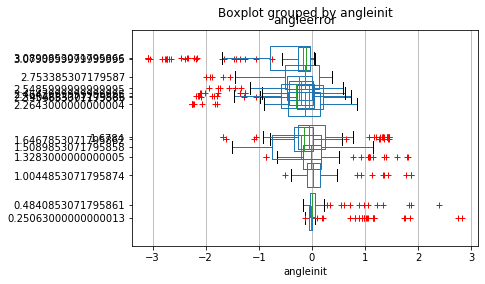

In [22]:
position = df_angle_all.groupby('numtrial').first()['angleinit'].sort_values()
ax = df_angle_all.boxplot(column='angleerror', by = 'angleinit', sym = 'r+', vert=False, positions = position)
ax.yaxis.grid(False)
# x axis lable is the angle error, and y axis is angle init

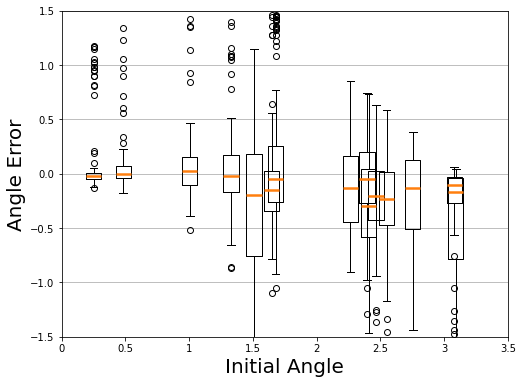

In [24]:
position = df_angle_all.groupby('numtrial').first()['angleinit']#.sort_values()
medianprops = dict(linestyle='-.', linewidth=2.5)
#print(df_angle_all['angleerror'].shape)
fig1, ax1 = plt.subplots(figsize=(8,6))
_=ax1.boxplot(df_angle_all['angleerror'].values.reshape(num_qual,15), positions=position, widths=0.12*np.ones((15,)),
             medianprops=medianprops)
_=plt.xticks(np.arange(0,3.6,0.5),('0','0.5','1','1.5','2','2.5','3','3.5'))
_=plt.xlim((0,3.5))
_=plt.ylim((-1.5,1.5))
_=plt.ylabel('Angle Error',fontsize=20)
_=plt.xlabel('Initial Angle',fontsize=20)
_=plt.grid(axis='y')

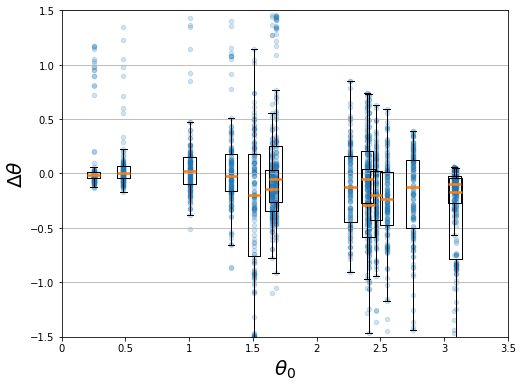

In [32]:
position = df_angle_all.groupby('numtrial').first()['angleinit']#.sort_values()
medianprops = dict(linestyle='-.', linewidth=2.5)
#mpl.rcParams['pdf.fonttype'] = 42
fig1, ax1 = plt.subplots(figsize=(8,6))
df_angle_all.plot.scatter(x='angleinit',y='angleerror',ax=ax1,alpha=0.2)
ax1.boxplot(df_angle_all['angleerror'].values.reshape(num_qual,15), positions=position, widths=0.1*np.ones((15,)),
             medianprops=medianprops,showfliers=False)
ang_err = mpl.cbook.boxplot_stats(df_angle_all['angleerror'].values.reshape(num_qual,15), whis=1.5, bootstrap=None, labels=None, autorange=False)
ang_err_q1q3 = np.array([[e['q1'], e['q3']] for e in ang_err])
_=plt.xticks(np.arange(0,3.6,0.5),('0','0.5','1','1.5','2','2.5','3','3.5'))
_=plt.xlim((0,3.5))
_=plt.ylim((-1.5,1.5))
_=plt.ylabel(r'$\Delta \theta$',fontsize=20)
plt.xlabel(r'$\theta_0$',fontsize=20)
plt.grid(axis='y')
#plt.savefig('AngleError_InitAngle.pdf', transparent=True)  
tikzplotlib.save("AngleError.tex")

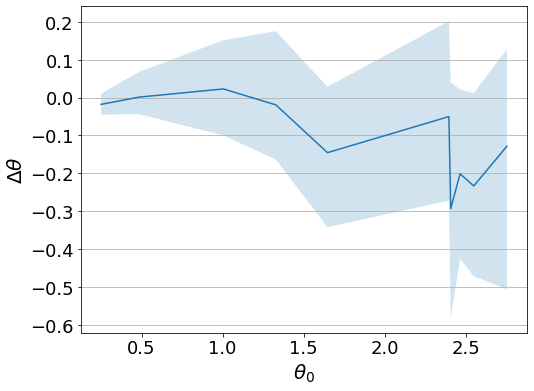

In [27]:
position = df_angle_all.groupby('numtrial').first()['angleinit']
medianprops = dict(linestyle='-.', linewidth=2.5)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 18})
fig1, ax1 = plt.subplots(figsize=(8,6))
# df_roulette_all.plot.scatter(x='omegainitabs',y='time',ax=ax1,alpha=0.2)
# _=ax1.boxplot(df_roulette_all['time'].values.reshape(num_qual,35), positions=position, widths=0.05*np.ones((35,)),
#              medianprops=medianprops, showfliers=False, meanline=False)
# plt.xticks(np.arange(0,4.1,1),('0','1','2','3','4'))
# plt.yticks(np.arange(0,6,1))
# plt.xlim((0,3.1))
# plt.ylim((0,3.8))
_=plt.ylabel('$\Delta\\theta$',fontsize=20)
_=plt.xlabel('$\\theta_0$',fontsize=20)
_=plt.grid(axis='y')

position = np.array(position)
position = position[5:]

position_ind = np.argsort(position)
position_new = np.sort(position)
dat = df_angle_all['angleerror'].values.reshape(num_qual,15)
dat = dat[:,5:]
dat = dat[:,position_ind]

median1 = np.median(dat,axis=0)
std1 = np.std(dat, axis=0)
upper = np.quantile(dat, 0.75, axis=0)
lower = np.quantile(dat, 0.25, axis=0)
plt.plot(position_new, median1)
plt.fill_between(position_new, lower, upper, alpha=0.2)
# plt.savefig('BettingTime_Omegainit.pdf', transparent=True)  

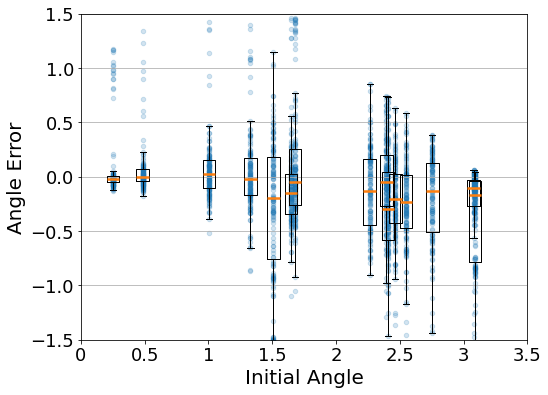

In [143]:
position = df_angle_all.groupby('numtrial').first()['angleinit']#.sort_values()
medianprops = dict(linestyle='-.', linewidth=2.5)
mpl.rcParams['pdf.fonttype'] = 42
fig1, ax1 = plt.subplots(figsize=(8,6))
df_angle_all.plot.scatter(x='angleinit',y='angleerror',ax=ax1,alpha=0.2)
ax1.boxplot(df_angle_all['angleerror'].values.reshape(num_qual,15), positions=position, widths=0.1*np.ones((15,)),
             medianprops=medianprops,showfliers=False)
ang_err = mpl.cbook.boxplot_stats(df_angle_all['angleerror'].values.reshape(num_qual,15), whis=1.5, bootstrap=None, labels=None, autorange=False)
ang_err_q1q3 = np.array([[e['q1'], e['q3']] for e in ang_err])
_=plt.xticks(np.arange(0,3.6,0.5),('0','0.5','1','1.5','2','2.5','3','3.5'))
_=plt.xlim((0,3.5))
_=plt.ylim((-1.5,1.5))
_=plt.ylabel('Angle Error',fontsize=20)
plt.xlabel('Initial Angle',fontsize=20)
plt.grid(axis='y')
plt.savefig('AngleError_InitAngle.pdf', transparent=True)  


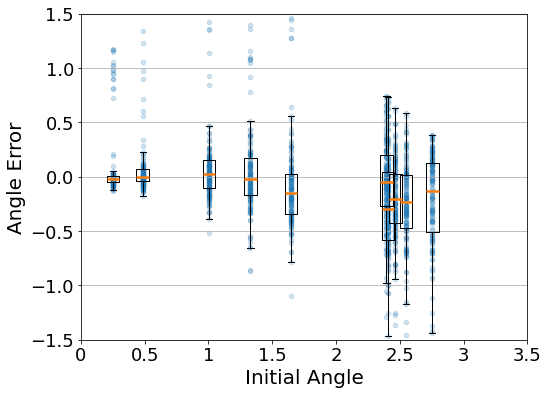

In [142]:
position = df_angle_all.groupby('numtrial').first()['angleinit'][5:]#.sort_values()
medianprops = dict(linestyle='-.', linewidth=2.5)
mpl.rcParams['pdf.fonttype'] = 42
fig1, ax1 = plt.subplots(figsize=(8,6))
df_angle_all[df_angle_all.numtrial>=5].plot.scatter(x='angleinit',y='angleerror',ax=ax1,alpha=0.2)
ax1.boxplot(df_angle_all['angleerror'].values.reshape(num_qual,15)[:,5:], positions=position, widths=0.1*np.ones((10,)),
             medianprops=medianprops,showfliers=False)
ang_err = mpl.cbook.boxplot_stats(df_angle_all['angleerror'].values.reshape(num_qual,15), whis=1.5, bootstrap=None, labels=None, autorange=False)
ang_err_q1q3 = np.array([[e['q1'], e['q3']] for e in ang_err])
_=plt.xticks(np.arange(0,3.6,0.5),('0','0.5','1','1.5','2','2.5','3','3.5'))
_=plt.xlim((0,3.5))
_=plt.ylim((-1.5,1.5))
_=plt.ylabel('Angle Error',fontsize=20)
plt.xlabel('Initial Angle',fontsize=20)
plt.grid(axis='y')
plt.savefig('AngleError_InitAngle.pdf', transparent=True)  


In [24]:
print(np.array(ang_err_q1q3)[:,1])

[ 0.13929643  0.16681004 -0.04504133  0.24456427 -0.03278726  0.00855617
  0.14765958  0.06184254  0.05177688  0.11506114  0.24738547  0.07463717
  0.00905305  0.16503047  0.01287353]


[ 0.13929643  0.16681004 -0.04504133  0.24456427 -0.03278726  0.00855617
  0.14765958  0.06184254  0.05177688  0.11506114  0.24738547  0.07463717
  0.00905305  0.16503047  0.01287353]


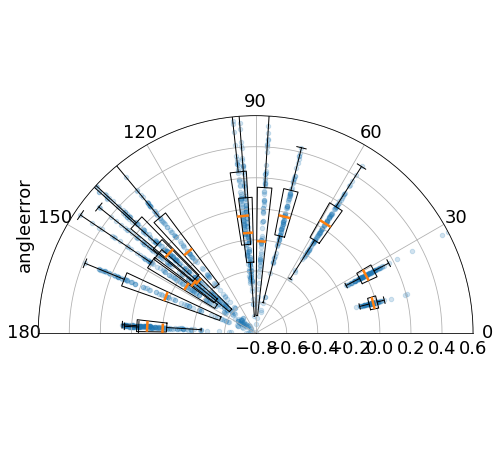

In [25]:
# Compute pie slices
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 18})
theta = position.to_numpy()#np.linspace(0.0, np.pi, N, endpoint=False)
radii = ang_err_q1q3[:,1]#10 * np.random.rand(N)
bottom = ang_err_q1q3[:,0]
print(radii)
width = np.pi / 20# * np.random.rand(N)

plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')
df_angle_all.plot.scatter(x='angleinit',y='angleerror',ax=ax,alpha=0.2,zorder=0)
ax.boxplot(df_angle_all['angleerror'].values.reshape(num_qual,15), positions=position, widths=0.1*np.ones((15,)),
             medianprops=medianprops,showfliers=False)

ax.set_thetamin(0)
ax.set_thetamax(180)
#bars = ax.bar(theta, radii, width=width, bottom=bottom, zorder=1)
plt.xticks(np.arange(0,np.pi+0.1,np.pi/6),('0','30','60','90','120','150','180'))
# Use custom colors and opacity
# for r, bar in zip(radii, bars):
#     bar.set_facecolor(plt.cm.viridis(189))
#     bar.set_alpha(0.66)
plt.xlabel('')
plt.ylim([-0.8,0.6])
plt.grid(axis='y')
plt.grid(axis='x')
plt.savefig('AngleError_InitAngle_Polar.pdf', transparent=True)

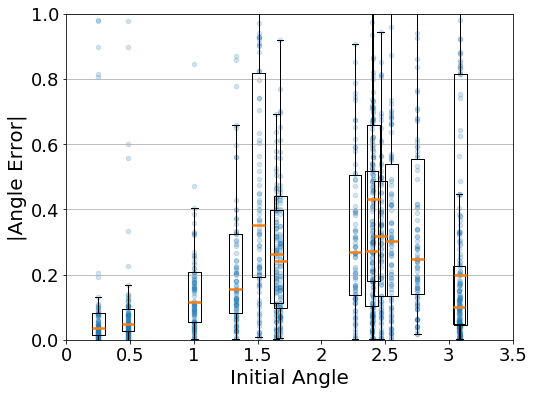

In [26]:
position = df_angle_all.groupby('numtrial').first()['angleinit']#.sort_values()
medianprops = dict(linestyle='-.', linewidth=2.5)
mpl.rcParams['pdf.fonttype'] = 42
fig1, ax1 = plt.subplots(figsize=(8,6))
df_angle_all.plot.scatter(x='angleinit',y='angleerrorabs',ax=ax1,alpha=0.2)
ax1.boxplot(df_angle_all['angleerrorabs'].values.reshape(num_qual,15), positions=position, widths=0.1*np.ones((15,)),
             medianprops=medianprops,showfliers=False)
_=plt.xticks(np.arange(0,3.6,0.5),('0','0.5','1','1.5','2','2.5','3','3.5'))
_=plt.xlim((0,3.5))
_=plt.ylim((0,1.0))
_=plt.ylabel('|Angle Error|',fontsize=20)
plt.xlabel('Initial Angle',fontsize=20)
plt.grid(axis='y')
plt.savefig('AngleErrorAbs_InitAngle.pdf', transparent=True)  


(138, 15)


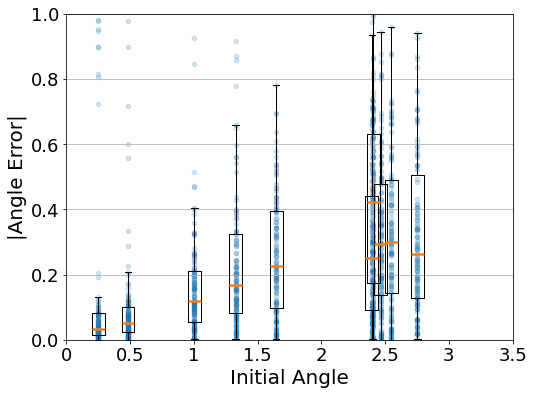

In [136]:
position = df_angle_all.groupby('numtrial').first()['angleinit'][5:]
medianprops = dict(linestyle='-.', linewidth=2.5)
mpl.rcParams['pdf.fonttype'] = 42
fig1, ax1 = plt.subplots(figsize=(8,6))
df_angle_all[df_angle_all.numtrial>=5].plot.scatter(x='angleinit',y='angleerrorabs',ax=ax1,alpha=0.2)
print(df_angle_all['angleerrorabs'].values.reshape(num_qual,15)[5:,:].shape)
ax1.boxplot(df_angle_all['angleerrorabs'].values.reshape(num_qual,15)[:,5:], positions=position, widths=0.1*np.ones((10,)),
             medianprops=medianprops,showfliers=False)
_=plt.xticks(np.arange(0,3.6,0.5),('0','0.5','1','1.5','2','2.5','3','3.5'))
_=plt.xlim((0,3.5))
_=plt.ylim((0,1.0))
_=plt.ylabel('|Angle Error|',fontsize=20)
plt.xlabel('Initial Angle',fontsize=20)
plt.grid(axis='y')
# plt.savefig('AngleErrorAbs_InitAngle.pdf', transparent=True)  


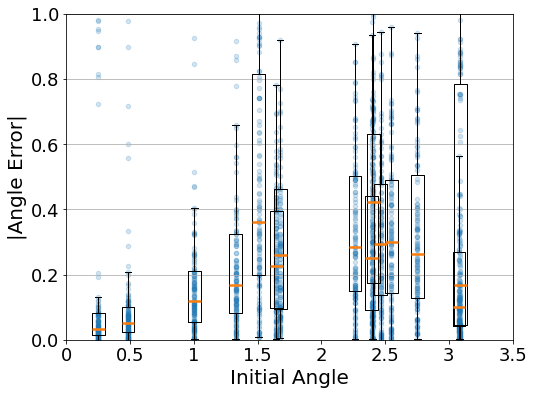

In [140]:
position = df_angle_all.groupby('numtrial').first()['angleinit']
medianprops = dict(linestyle='-.', linewidth=2.5)
mpl.rcParams['pdf.fonttype'] = 42
fig1, ax1 = plt.subplots(figsize=(8,6))
df_angle_all.plot.scatter(x='angleinit',y='angleerrorabs',ax=ax1,alpha=0.2)
ax1.boxplot(df_angle_all['angleerrorabs'].values.reshape(num_qual,15), positions=position, widths=0.1*np.ones((15,)),
             medianprops=medianprops,showfliers=False)
_=plt.xticks(np.arange(0,3.6,0.5),('0','0.5','1','1.5','2','2.5','3','3.5'))
_=plt.xlim((0,3.5))
_=plt.ylim((0,1.0))
_=plt.ylabel('|Angle Error|',fontsize=20)
plt.xlabel('Initial Angle',fontsize=20)
plt.grid(axis='y')
plt.savefig('AngleErrorAbs_InitAngle.pdf', transparent=True)  


[ 0.13929643  0.16681004 -0.04504133  0.24456427 -0.03278726  0.00855617
  0.14765958  0.06184254  0.05177688  0.11506114  0.24738547  0.07463717
  0.00905305  0.16503047  0.01287353]


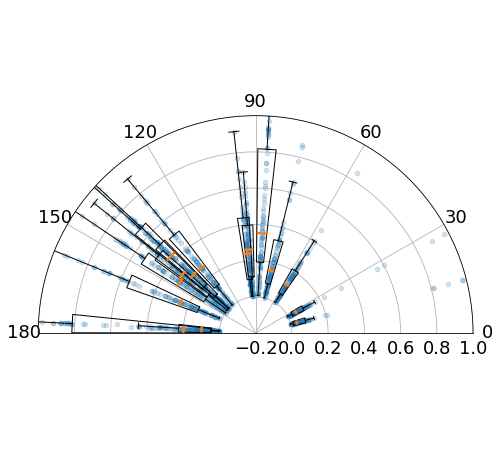

In [27]:
# Compute pie slices
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 18})
theta = position.to_numpy()#np.linspace(0.0, np.pi, N, endpoint=False)
radii = ang_err_q1q3[:,1]#10 * np.random.rand(N)
bottom = ang_err_q1q3[:,0]
print(radii)
width = np.pi / 20# * np.random.rand(N)

plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')
df_angle_all.plot.scatter(x='angleinit',y='angleerrorabs',ax=ax,alpha=0.2,zorder=0)
ax.boxplot(df_angle_all['angleerrorabs'].values.reshape(num_qual,15), positions=position, widths=0.1*np.ones((15,)),
             medianprops=medianprops,showfliers=False)

ax.set_thetamin(0)
ax.set_thetamax(180)
#bars = ax.bar(theta, radii, width=width, bottom=bottom, zorder=1)
plt.xticks(np.arange(0,np.pi+0.1,np.pi/6),('0','30','60','90','120','150','180'))
# Use custom colors and opacity
# for r, bar in zip(radii, bars):
#     bar.set_facecolor(plt.cm.viridis(189))
#     bar.set_alpha(0.66)
plt.xlabel('')
plt.ylabel('')
plt.ylim([-0.2,1])
plt.grid(axis='y')
plt.grid(axis='x')
plt.savefig('AngleErrorAbs_InitAngle_Polar.pdf', transparent=True)

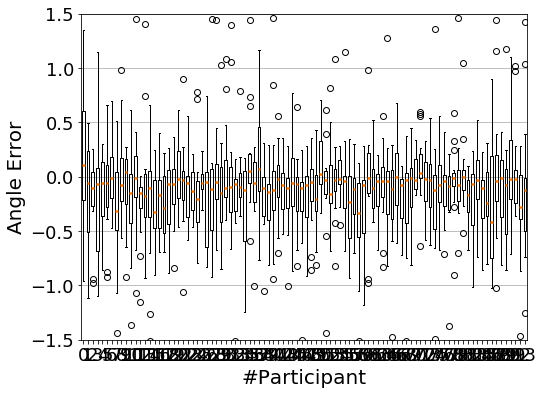

In [28]:
position = range(num_qual)#df_angle_all.groupby('numtrial').first()['angleinit']#.sort_values()
medianprops = dict(linestyle='-.', linewidth=2.5)
#print(df_angle_all['angleerror'].shape)
fig1, ax1 = plt.subplots(figsize=(8,6))
_=ax1.boxplot(df_angle_all['angleerror'].values.reshape(15,num_qual), positions=position, widths=0.57*np.ones((num_qual,)),
             medianprops=medianprops)
# _=plt.xticks(np.arange(0,3.6,0.5),('0','0.5','1','1.5','2','2.5','3','3.5'))
# _=plt.xlim((0,3.5))
_=plt.ylim((-1.5,1.5))
_=plt.ylabel('Angle Error',fontsize=20)
_=plt.xlabel('#Participant',fontsize=20)
_=plt.grid(axis='y')

# Part 2: Speed

In [79]:
df_speed_all.head(5)

omegainit  omegafinal       time  speederror  speederrorabs  speederrorsq  \
0  -0.767945   -0.994838   7.880509    0.226893       0.226893      0.051480   
1  -2.460914   -1.658063   7.363950   -0.802851       0.802851      0.644570   
2   3.438299    5.166175   9.779801    1.727876       1.727876      2.985555   
3   1.727876    0.820305   6.214458   -0.907571       0.907571      0.823686   
4  -2.042035   -3.577925  20.209352    1.535890       1.535890      2.358957   

   numtrial  omegainitabs  speederrormean  username   lambda  speederrorvar  \
0         0      0.767945        0.520108  daa26e48  0.57975       0.267071   
1         1      2.460914        0.520108  daa26e48  0.57975       0.267071   
2         2      3.438299        0.520108  daa26e48  0.57975       0.267071   
3         3      1.727876        0.520108  daa26e48  0.57975       0.267071   
4         4      2.042035        0.520108  daa26e48  0.57975       0.267071   

    Domegam  
0  1.154554  
1  1.154554  
2  1.154554  
3  1.154554  
4  1.154554

### Time vs game number

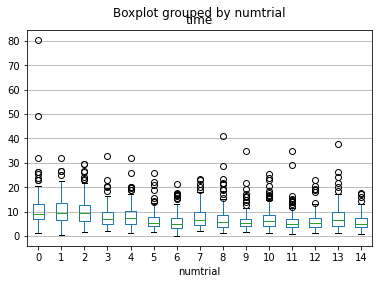

In [80]:
ax = df_speed_all.boxplot(column = 'time', by = 'numtrial')
ax.xaxis.grid(False)

### Error vs game number

(0, 2)

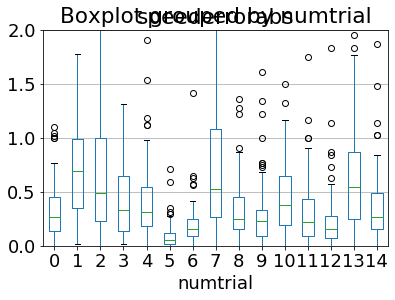

In [31]:
ax = df_speed_all.boxplot(column = 'speederrorabs', by = 'numtrial')
ax.xaxis.grid(False)
ax.set_ylim((0,2))

### Plot speed: time vs initial speed

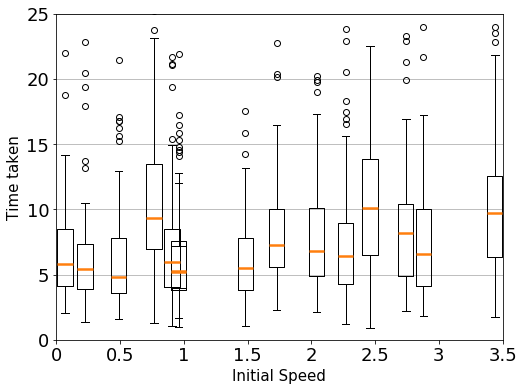

In [32]:
position = df_speed_all.groupby('numtrial').first()['omegainitabs']#.sort_values()
medianprops = dict(linestyle='-.', linewidth=2.5)
fig1, ax1 = plt.subplots(figsize=(8,6))
_=ax1.boxplot(df_speed_all['time'].values.reshape(num_qual,15), positions=position, widths=0.12*np.ones((15,)),
             medianprops=medianprops)
_=plt.xticks(np.arange(0,4,0.5),('0','0.5','1','1.5','2','2.5','3','3.5'))
_=plt.xlim((0,3.5))
_=plt.ylim((0,25))
_=plt.ylabel('Time taken',fontsize=15)
_=plt.xlabel('Initial Speed',fontsize=15)
_=plt.grid(axis='y')

66cb5268
eaeb5264


Text(0, 0.5, 'Speed error')

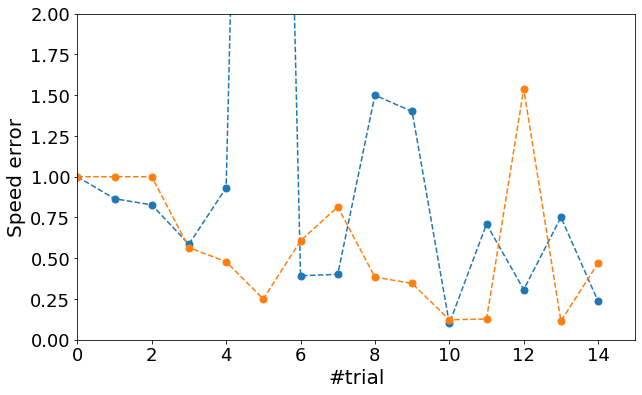

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
groups = df_speed_all.groupby('username')
t = 0
for name, group in groups:
    spdNorm = group.speederrorabs/abs(group.omegainit)
    if sum(abs(spdNorm - 1.0) <= 2e-1) > 3:
        print(name)
        ax.plot(group.numtrial, spdNorm, marker='o', linestyle='--', ms=7, label=name)
ax.set_ylim(0,2)
ax.set_xlim(0,15)
ax.set_xlabel('#trial',fontsize=20)
ax.set_ylabel('Speed error',fontsize=20)
#ax.set_title(usedname)


### Speed error vs initial speed

(0, 2)

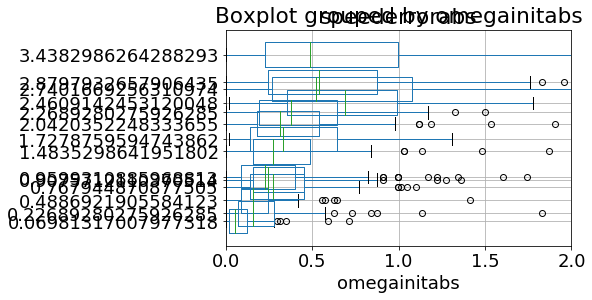

In [34]:
# Note: there are two speeds that are exactly opposite sign after collapsing on nearest grid in the game (0.9599 and -0.9599)
position = df_speed_all.groupby('numtrial').first()['omegainitabs'].drop_duplicates().sort_values()
ax = df_speed_all.boxplot(vert = False, column = 'speederrorabs', by = 'omegainitabs',positions = position)
ax.set_xlim(0,2)

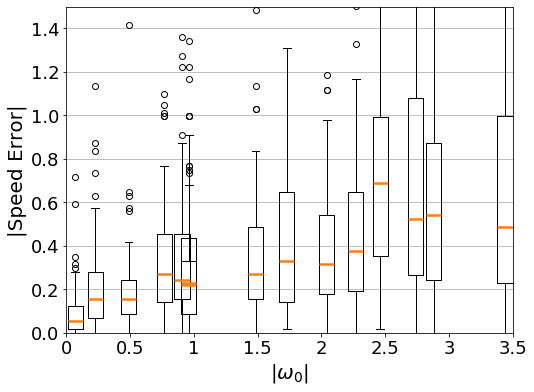

In [35]:
position = df_speed_all.groupby('numtrial').first()['omegainitabs']#.sort_values()
medianprops = dict(linestyle='-.', linewidth=2.5)
fig1, ax1 = plt.subplots(figsize=(8,6))
_=ax1.boxplot(df_speed_all['speederrorabs'].values.reshape(num_qual,15), positions=position, widths=0.12*np.ones((15,)),
             medianprops=medianprops)
_=plt.xticks(np.arange(0,4,0.5),('0','0.5','1','1.5','2','2.5','3','3.5'))
_=plt.xlim((0,3.5))
_=plt.ylim((0,1.5))
_=plt.ylabel('|Speed Error|',fontsize=20)
_=plt.xlabel('$|\omega_0|$',fontsize=20)
_=plt.grid(axis='y')


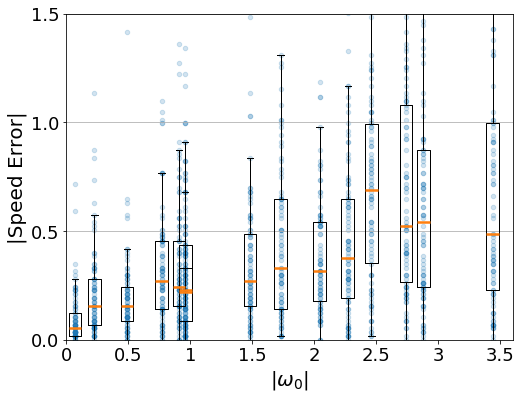

In [36]:
position = df_speed_all.groupby('numtrial').first()['omegainitabs']#.sort_values()
medianprops = dict(linestyle='-.', linewidth=2.5)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 18})
fig1, ax1 = plt.subplots(figsize=(8,6))
df_speed_all.plot.scatter(x='omegainitabs',y='speederrorabs',ax=ax1,alpha=0.2)
_=ax1.boxplot(df_speed_all['speederrorabs'].values.reshape(num_qual,15), positions=position, widths=0.1*np.ones((15,)),
             medianprops=medianprops, showfliers=False)
_=plt.xticks(np.arange(0,4,0.5),('0','0.5','1','1.5','2','2.5','3','3.5'))
plt.yticks(np.arange(0,1.6,0.5))
_=plt.xlim((0,3.6))
_=plt.ylim((0,1.5))
_=plt.ylabel('|Speed Error|',fontsize=20)
_=plt.xlabel('$|\omega_0|$',fontsize=20)
_=plt.grid(axis='y')
# plt.savefig('SpeedErrorAbs_SpeedAbs.pdf', transparent=True)  

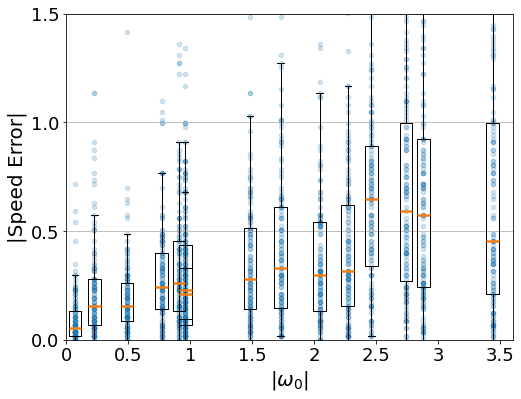

In [127]:
position = df_speed_all.groupby('numtrial').first()['omegainitabs']#.sort_values()
medianprops = dict(linestyle='-.', linewidth=2.5)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 18})
fig1, ax1 = plt.subplots(figsize=(8,6))
df_speed_all.plot.scatter(x='omegainitabs',y='speederrorabs',ax=ax1,alpha=0.2)
_=ax1.boxplot(df_speed_all['speederrorabs'].values.reshape(num_qual,15), positions=position, widths=0.1*np.ones((15,)),
             medianprops=medianprops, showfliers=False)
_=plt.xticks(np.arange(0,4,0.5),('0','0.5','1','1.5','2','2.5','3','3.5'))
plt.yticks(np.arange(0,1.6,0.5))
_=plt.xlim((0,3.6))
_=plt.ylim((0,1.5))
_=plt.ylabel('|Speed Error|',fontsize=20)
_=plt.xlabel('$|\omega_0|$',fontsize=20)
_=plt.grid(axis='y')
plt.savefig('SpeedErrorAbs_SpeedAbs.pdf', transparent=True)  

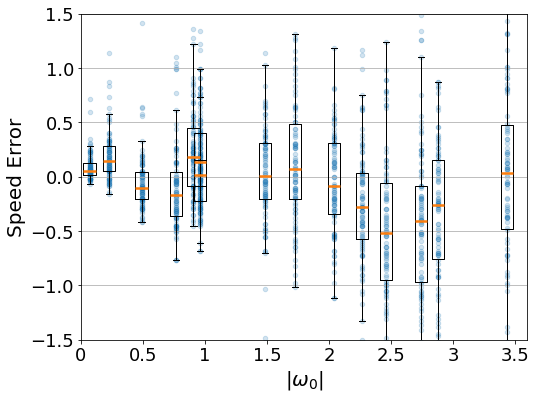

In [483]:
position = df_speed_all.groupby('numtrial').first()['omegainitabs']#.sort_values()
medianprops = dict(linestyle='-.', linewidth=2.5)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 18})
fig1, ax1 = plt.subplots(figsize=(8,6))
df_speed_all.plot.scatter(x='omegainitabs',y='speederror',ax=ax1,alpha=0.2)
_=ax1.boxplot(df_speed_all['speederror'].values.reshape(num_qual,15), positions=position, widths=0.1*np.ones((15,)),
             medianprops=medianprops, showfliers=False)
_=plt.xticks(np.arange(0,4,0.5),('0','0.5','1','1.5','2','2.5','3','3.5'))
plt.yticks(np.arange(-1.5,1.6,0.5))
_=plt.xlim((0,3.6))
_=plt.ylim((-1.5,1.5))
_=plt.ylabel('Speed Error',fontsize=20)
_=plt.xlabel('$|\omega_0|$',fontsize=20)
_=plt.grid(axis='y')
# plt.savefig('SpeedErrorAbs_SpeedAbs.pdf', transparent=True)  

In [82]:
2160/15

144.0

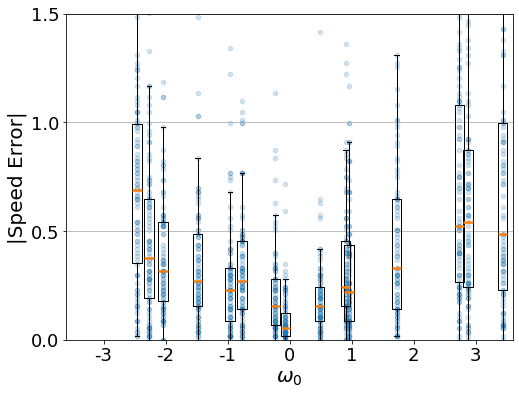

In [37]:
position = df_speed_all.groupby('numtrial').first()['omegainit']#.sort_values()
medianprops = dict(linestyle='-.', linewidth=2.5)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 18})
fig1, ax1 = plt.subplots(figsize=(8,6))
df_speed_all.plot.scatter(x='omegainit',y='speederrorabs',ax=ax1,alpha=0.2)
_=ax1.boxplot(df_speed_all['speederrorabs'].values.reshape(num_qual,15), positions=position, widths=0.15*np.ones((15,)),
             medianprops=medianprops, showfliers=False)
_=plt.xticks(np.arange(-3,3.1,1),('-3','-2','-1','0','1','2','3','3.5'))
plt.yticks(np.arange(0,1.6,0.5))
_=plt.xlim((-3.6,3.6))
_=plt.ylim((0,1.5))
_=plt.ylabel('|Speed Error|',fontsize=20)
_=plt.xlabel('$\omega_0$',fontsize=20)
_=plt.grid(axis='y')
# plt.savefig('SpeedErrorAbs_SpeedAbs.pdf', transparent=True)  

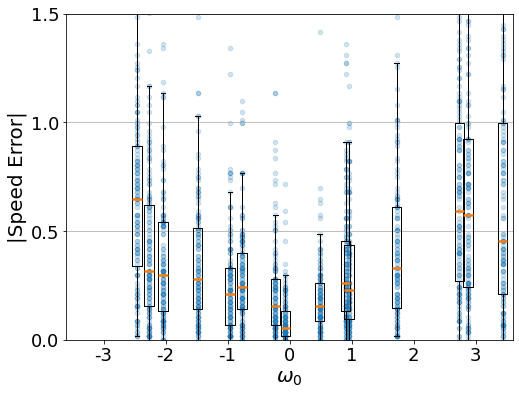

In [131]:
position = df_speed_all.groupby('numtrial').first()['omegainit']#.sort_values()
medianprops = dict(linestyle='-.', linewidth=2.5)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 18})
fig1, ax1 = plt.subplots(figsize=(8,6))
df_speed_all.plot.scatter(x='omegainit',y='speederrorabs',ax=ax1,alpha=0.2)
_=ax1.boxplot(df_speed_all['speederrorabs'].values.reshape(num_qual,15), positions=position, widths=0.15*np.ones((15,)),
             medianprops=medianprops, showfliers=False)
_=plt.xticks(np.arange(-3,3.1,1),('-3','-2','-1','0','1','2','3'))
plt.yticks(np.arange(0,1.6,0.5))
_=plt.xlim((-3.6,3.6))
_=plt.ylim((0,1.5))
_=plt.ylabel('|Speed Error|',fontsize=20)
_=plt.xlabel('$\omega_0$',fontsize=20)
_=plt.grid(axis='y')
plt.savefig('SpeedErrorAbs_Speed.pdf', transparent=True)  

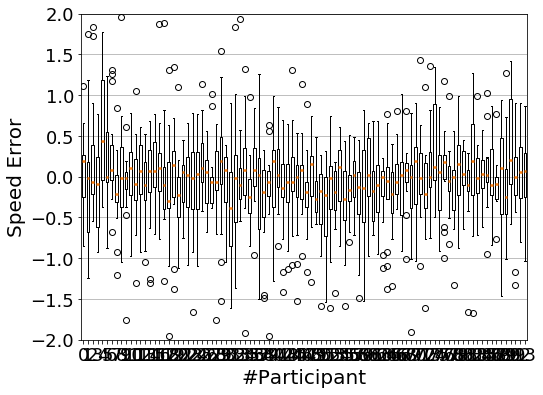

In [38]:
position = range(num_qual)#df_angle_all.groupby('numtrial').first()['angleinit']#.sort_values()
medianprops = dict(linestyle='-.', linewidth=2.5)
#print(df_angle_all['angleerror'].shape)
fig1, ax1 = plt.subplots(figsize=(8,6))
_=ax1.boxplot(df_speed_all['speederror'].values.reshape(15,num_qual), positions=position, widths=0.57*np.ones((num_qual,)),
             medianprops=medianprops)
_=plt.ylim((-2,2))
_=plt.ylabel('Speed Error',fontsize=20)
_=plt.xlabel('#Participant',fontsize=20)
_=plt.grid(axis='y')

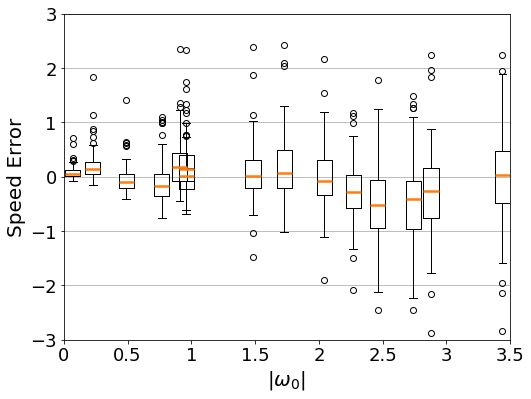

In [39]:
position = df_speed_all.groupby('numtrial').first()['omegainitabs']#.sort_values()
medianprops = dict(linestyle='-.', linewidth=2.5)
fig1, ax1 = plt.subplots(figsize=(8,6))
_=ax1.boxplot(df_speed_all['speederror'].values.reshape(num_qual,15), positions=position, widths=0.12*np.ones((15,)),
             medianprops=medianprops)
_=plt.xticks(np.arange(0,4,0.5),('0','0.5','1','1.5','2','2.5','3','3.5'))
_=plt.xlim((0,3.5))
_=plt.ylim((-3,3))
_=plt.ylabel('Speed Error',fontsize=20)
_=plt.xlabel('$|\omega_0|$',fontsize=20)
_=plt.grid(axis='y')

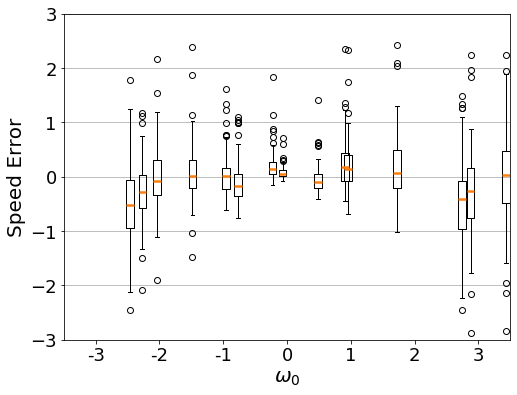

In [40]:
position = df_speed_all.groupby('numtrial').first()['omegainit']#.sort_values()
medianprops = dict(linestyle='-.', linewidth=2.5)
fig1, ax1 = plt.subplots(figsize=(8,6))
_=ax1.boxplot(df_speed_all['speederror'].values.reshape(num_qual,15), positions=position, widths=0.12*np.ones((15,)),
             medianprops=medianprops)
_=plt.xticks(np.arange(-4,4,1),('-4','-3','-2','-1','0','1','2','3','4'))
_=plt.xlim((-3.5,3.5))
_=plt.ylim((-3,3))
_=plt.ylabel('Speed Error',fontsize=20)
_=plt.xlabel('$\omega_0$',fontsize=20)
_=plt.grid(axis='y')

### Speed error vs Angle error all users

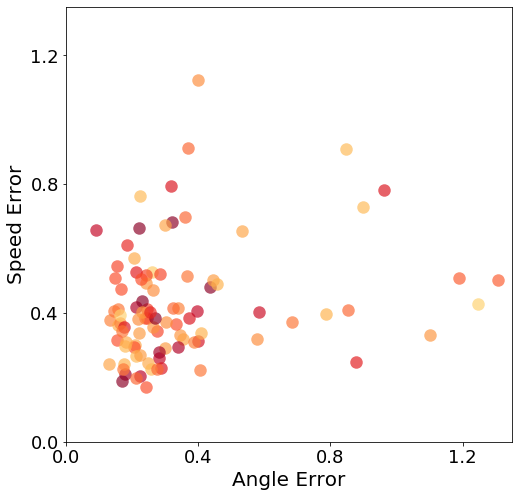

In [41]:
cm = plt.get_cmap('YlOrRd')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 18})
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(8,8))
ccc = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
groups = df_roulette_all.groupby('username')
for name, group in groups:
    if name=="67d26e6a":
        continue
    angleerror = df_angle_all[df_angle_all['username']==name]['angleerrormean'].tolist()
    angletime  = df_angle_all[df_angle_all['username']==name]['time'].median()
    speederror = df_speed_all[df_speed_all['username']==name]['speederrormean'].tolist()
    speedtime  = df_speed_all[df_speed_all['username']==name]['time'].median()
    time = angletime + speedtime
    ax.plot(angleerror[0], speederror[0], marker='.', linestyle='', markersize=25, markeredgecolor='none',
            linewidth=0.5, label=name, color=ccc[min(39,int((angletime+speedtime)*2.5))], alpha=0.67)
plt.yticks(np.arange(0,1.5,0.4))
plt.xticks(np.arange(0,1.5,0.4))
ax.set_ylim(0,1.35)
ax.set_xlim(0,1.35)
ax.set_xlabel('Angle Error',fontsize=20)
ax.set_ylabel('Speed Error',fontsize=20)
# plt.savefig('SpeedErrorAbs_AngleErrorAbs_AllUsers.pdf', transparent=True) 

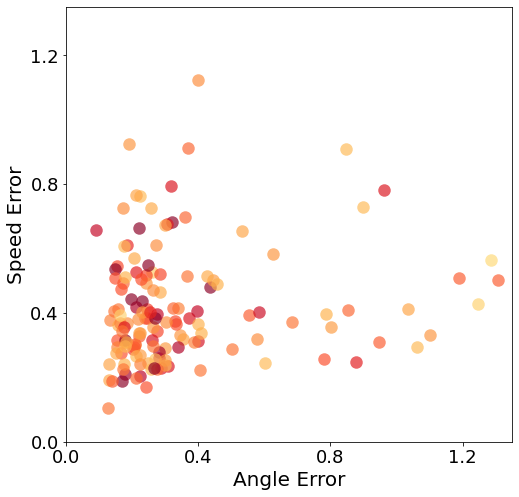

In [144]:
cm = plt.get_cmap('YlOrRd')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 18})
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(8,8))
ccc = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
groups = df_roulette_all.groupby('username')
for name, group in groups:
    if name=="67d26e6a":
        continue
    angleerror = df_angle_all[df_angle_all['username']==name]['angleerrormean'].tolist()
    angletime  = df_angle_all[df_angle_all['username']==name]['time'].median()
    speederror = df_speed_all[df_speed_all['username']==name]['speederrormean'].tolist()
    speedtime  = df_speed_all[df_speed_all['username']==name]['time'].median()
    time = angletime + speedtime
    ax.plot(angleerror[0], speederror[0], marker='.', linestyle='', markersize=25, markeredgecolor='none',
            linewidth=0.5, label=name, color=ccc[min(39,int((angletime+speedtime)*2.5))], alpha=0.67)
plt.yticks(np.arange(0,1.5,0.4))
plt.xticks(np.arange(0,1.5,0.4))
ax.set_ylim(0,1.35)
ax.set_xlim(0,1.35)
ax.set_xlabel('Angle Error',fontsize=20)
ax.set_ylabel('Speed Error',fontsize=20)
plt.savefig('SpeedErrorAbs_AngleErrorAbs_AllUsers.pdf', transparent=True) 

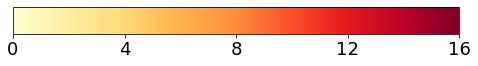

In [42]:
fig, ax = plt.subplots(figsize=(8,0.5))
norm = mpl.colors.Normalize(vmin=0, vmax=16)
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cm, norm=norm,ticks=[0,4,8,12,16],
                                orientation='horizontal')
# plt.savefig('SpeedErrorAbs_AngleErrorAbs_AllUsers_colorbar.pdf', transparent=True) 

In [43]:
df_angle_all.time.median()

2.5778375000001144

# Part 3: Roulette



In [23]:
df_roulette_all.head(5)

thetainit  omegainit  thetafinal  thetabet      time      reward  \
0    4.90230   1.853600    7.682700  1.519628  6.613734   67.226803   
1    0.50973  -2.999100   -3.988920 -3.126209  2.481956  139.868532   
2    5.83950  -0.034121    5.788318 -0.505720  3.098487  284.655501   
3    4.87390  -1.572800    2.514700  2.797582  2.763995  294.915367   
4    3.05860   0.691290    4.095535 -2.109334  2.348565  382.919745   

   bettingerror  numtrial  omegainitabs   DthetaM  ...  best_time  \
0      0.120113         0      1.853600  0.545426  ...    1.72001   
1      0.862711         1      2.999100  0.545426  ...    1.97001   
2      0.010853         2      0.034121  0.545426  ...    1.04001   
3      0.282882         3      1.572800  0.545426  ...    1.62001   
4      0.078316         4      0.691290  0.545426  ...    1.20001   

   best_reward  username  bettingerrormean  bettingtimemean rhosq_numerator  \
0   365.252603  daa26e48          0.243122          2.22466        1.154819   
1   331.718191  daa26e48          0.243122          2.22466        3.023179   
2   502.639581  daa26e48          0.243122          2.22466        0.000391   
3   380.965183  daa26e48          0.243122          2.22466        0.831436   
4   459.798218  daa26e48          0.243122          2.22466        0.160621   

      rhosq  rewardratio  timedifference  timeratio  
0  0.679207     0.184056        4.893724   3.845172  
1  0.847160     0.421649        0.511946   1.259870  
2  0.000717     0.566321        2.058477   2.979286  
3  0.603863     0.774127        1.143985   1.706159  
4  0.227493     0.832800        1.148555   1.957121  

[5 rows x 23 columns]

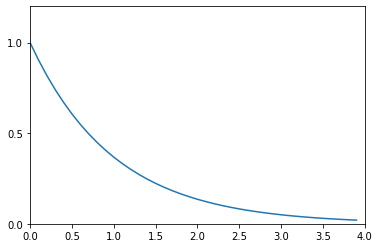

In [20]:
x=np.arange(0,4,0.1)
plt.plot(x, np.exp(-x),'-')
plt.xlim([0,4])
plt.ylim([0,1.2])
plt.yticks([0,0.5,1])
1
plt.savefig('ExponentialFunc.pdf', transparent=True)  

### Betting time of each game

(0.0, 8.0)

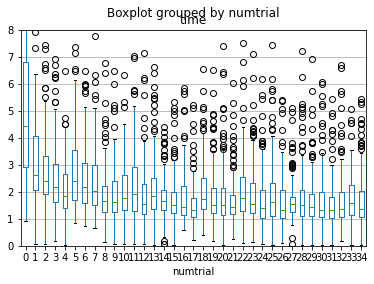

In [21]:
ax = df_roulette_all.boxplot(column='time', by='numtrial')
ax.xaxis.grid(False)
ax.set_ylim(0,8)

### Best betting time vs real betting time of each game

1, 9, 11, 14, 16, 17(Stable), 19(Neg), 20, 21(Neg), 22, 29, 39(no change), 40, 41(nosig), 42, 50, 59,63, 70(pos), 78, 92, 93 Neg

No. 50 optimal betting time is 0, 59!!! and 79, 81\ Partly 0. 68 OBT flat, 79

NoSignal: 24, 26, 32, 38

13 Oscillate

Text(0.5, 1.0, 'f8c26f28')

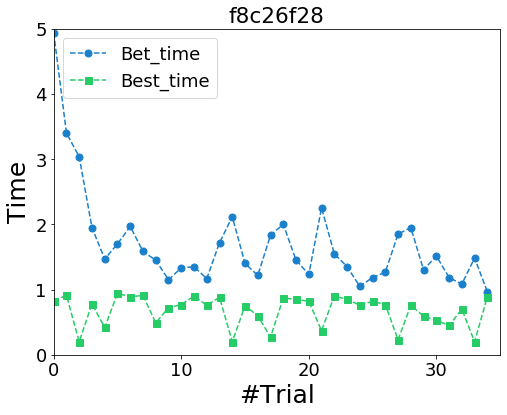

In [318]:
fig, ax = plt.subplots(figsize=(8,6))
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 18})
groups = df_roulette_all.groupby('username')
tcur=93
t=0
for name, group in groups:
    if t==tcur:
        usedname = name
        ax.plot(group.numtrial, group.time, marker='o', linestyle='--', ms=7, 
                label=name, color=[0.1,0.5,0.8])
        ax.plot(group.numtrial, group.best_time, marker='s',linestyle='--',ms=7,
               color=[0.15,0.8,0.4])
#         ax.plot(group.numtrial, group.omegainitabs,marker='x',linestyle='-',ms=7)
    t = t+1
#ax.legend(numpoints=1)
ax.set_ylim(0,5)
ax.set_xlim(0,35)
ax.set_xlabel('#Trial',fontsize=25)
ax.set_ylabel('Time',fontsize=25)
ax.set_yticks([0,1,2,3,4,5])
ax.set_xticks([0,10,20,30])
ax.legend(['Bet_time','Best_time','Omega_0'], loc='upper left')
ax.set_title(usedname)
# plt.savefig('Betting_Time_User'+str(tcur)+'.pdf', transparent=True) 

Text(0.5, 1.0, 'f8c26f28')

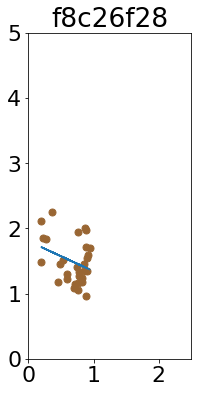

In [133]:
fig, ax = plt.subplots(figsize=(6,6))
groups = df_roulette_all.groupby('username')
tcur=93
t = 0
for name, group in groups:
    if t==tcur:
        usedname = name
        x = group.best_time.to_numpy()[5:]
        y = group.time.to_numpy()[5:]
        ax.plot(x, y, marker='o', linestyle='', ms=7, 
                label=name, color=[0.6,0.4,0.2])
        x = x.reshape(-1,1)
        model = LinearRegression(fit_intercept=True).fit(x, y)
        ax.plot(x, model.coef_ * x + model.intercept_)
    t = t+1
#ax.legend(numpoints=1)
ax.set_ylim(0,5)
ax.set_xlim(0,2.5)
# ax.set_xlabel('#Trial',fontsize=25)
# ax.set_ylabel('Time',fontsize=25)
ax.set_yticks([0,1,2,3,4,5])
ax.set_xticks([0,1,2])
ax.set_aspect(1)
# ax.legend(['Bet_time','Best_time','Omega_0'], loc='upper left')
ax.set_title(usedname)
# plt.savefig('Betting_Time_User'+str(tcur)+'_2.pdf', transparent=True) 

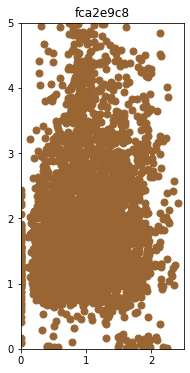

In [39]:
fig, ax = plt.subplots(figsize=(6,6))
groups = df_roulette_all.groupby('username')
all_score = []
all_rsq = []
all_slope = []
all_rewardratio = []
all_reward = []
all_intercept = []
all_responsetime = []
t = 0
for name, group in groups:
    usedname = name
    x = group.best_time.to_numpy()[5:]
    y = group.time.to_numpy()[5:]
    all_score.append(np.mean(group.reward.to_numpy()[15:]))
    all_rewardratio.append(np.mean(group.rewardratio.to_numpy()[15:]))
    yy = group.time.to_numpy()
    all_responsetime.append(np.mean([yy[33],yy[14]]))
    
    ax.plot(x, y, marker='o', linestyle='', ms=7, 
            label=name, color=[0.6,0.4,0.2])
    x = np.stack([x, np.ones(x.shape)]).T
#     x = x.reshape(-1,1)
    model = LinearRegression().fit(x, y)
    all_rsq.append(model.score(x,y))
    all_slope.append(model.coef_[0])
    all_intercept.append(model.intercept_)
#     ax.plot(x, model.coef_ * x + model.intercept_)
#ax.legend(numpoints=1)
ax.set_ylim(0,5)
ax.set_xlim(0,2.5)
# ax.set_xlabel('#Trial',fontsize=25)
# ax.set_ylabel('Time',fontsize=25)
ax.set_yticks([0,1,2,3,4,5])
ax.set_xticks([0,1,2])
ax.set_aspect(1)
# ax.legend(['Bet_time','Best_time','Omega_0'], loc='upper left')
ax.set_title(usedname)
all_reward = np.array(all_reward)
all_rewardratio = np.array(all_rewardratio)
all_slope = np.array(all_slope)
all_rsq = np.array(all_rsq)
all_score = np.array(all_score)
all_intercept = np.array(all_intercept)

In [37]:
c = np.array(df_roulette_all.omegainit[:35].abs())
a = np.arange(1,36)
Z = [x for _,x in sorted(zip(c,a))]
print(Z)
print(c[33],c[2],c[14],c[27],c[17])

[34, 3, 15, 28, 18, 22, 5, 32, 9, 31, 30, 17, 33, 10, 16, 25, 29, 13, 11, 27, 4, 26, 21, 1, 20, 24, 19, 14, 7, 35, 12, 23, 8, 2, 6]
0.0023001 0.034121 0.045218 0.21798 0.36909


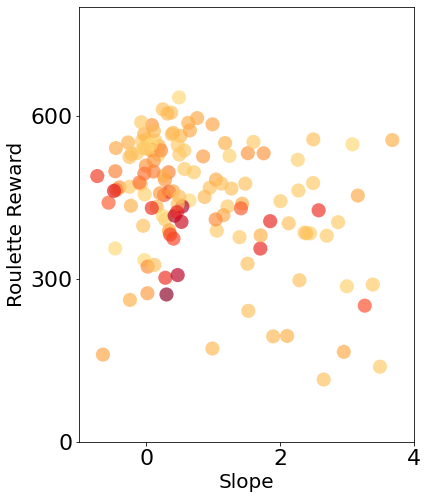

In [193]:
cm = plt.get_cmap('YlOrRd')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 22})
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(6,8))
ccc = np.array([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# ax.plot(all_score, all_slope, marker='.', linestyle='', markersize=25, markeredgecolor='none',
#         linewidth=0.5, label=name, color=ccc[22], alpha=0.67)#ccc[22]
cl = np.array(all_age / max(all_age) * 39, dtype=int)
mask = np.array(cl>=0)
cm = mpl.colors.ListedColormap(ccc)
# ax.scatter(all_score[mask], all_slope[mask], s=200, c=cl[mask], edgecolor='none',
#         label=name, cmap=cm, alpha=0.67)#ccc[22]color=ccc[cl[mask], :]
ax.scatter(all_slope[mask],all_score[mask], s=200, edgecolor='none',
        label=name, color=ccc[cl[mask], :], alpha=0.67)#ccc[22]
plt.xticks(np.arange(0,5,2))
plt.yticks(np.arange(0,801,300))
# plt.colorbar(cm)
# mpl.colorbar.ColorbarBase(ax,cmap=cm,boundaries = [-5., -.5, 0., .5, 1.])
ax.set_xlim(-1, 4)
ax.set_ylim(0,800)
ax.set_ylabel('Roulette Reward',fontsize=20)
ax.set_xlabel('Slope',fontsize=20)
plt.savefig('Slope_Reward_allplayers.pdf', transparent=True) 

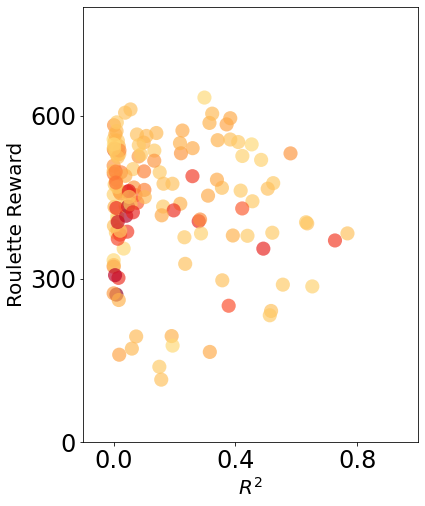

In [197]:
cm = plt.get_cmap('YlOrRd')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 24})
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(6,8))
ccc = np.array([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
cl = np.array(all_age / max(all_age) * 39, dtype=int)
mask = np.array(cl>=0)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# ax.plot(all_score, all_rsq, marker='.', linestyle='', markersize=25, markeredgecolor='none',
#         linewidth=0.5, label=name, color=ccc[22], alpha=0.67)
ax.scatter(all_rsq[mask], all_score[mask], s=200, edgecolor='none',
        label=name, color=ccc[cl[mask],:], alpha=0.67)
plt.xticks(np.arange(0,1.5,0.4))
plt.yticks(np.arange(0,801,300))
ax.set_xlim(-0.1, 1)
ax.set_ylim(0,800)
ax.set_ylabel('Roulette Reward',fontsize=20)
ax.set_xlabel('$R^2$',fontsize=20)
plt.savefig('Rsq_Reward_allplayers.pdf', transparent=True) 

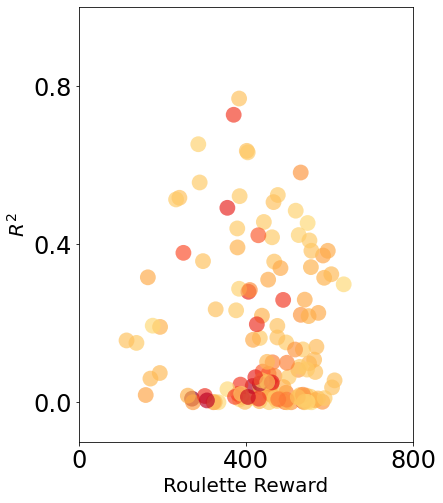

In [195]:
cm = plt.get_cmap('YlOrRd')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 24})
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(6,8))
ccc = np.array([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
cl = np.array(all_age / max(all_age) * 39, dtype=int)
mask = np.array(cl>=0)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# ax.plot(all_score, all_rsq, marker='.', linestyle='', markersize=25, markeredgecolor='none',
#         linewidth=0.5, label=name, color=ccc[22], alpha=0.67)
ax.scatter(all_score[mask], all_rsq[mask], s=250, edgecolor='none',
        label=name, color=ccc[cl[mask],:], alpha=0.67)
plt.yticks(np.arange(0,1.5,0.4))
plt.xticks(np.arange(0,801,400))
ax.set_ylim(-0.1, 1)
ax.set_xlim(0,800)
ax.set_xlabel('Roulette Reward',fontsize=20)
ax.set_ylabel('$R^2$',fontsize=20)
plt.savefig('Rsq_Reward_allplayers.pdf', transparent=True) 

-0.40303266968996865


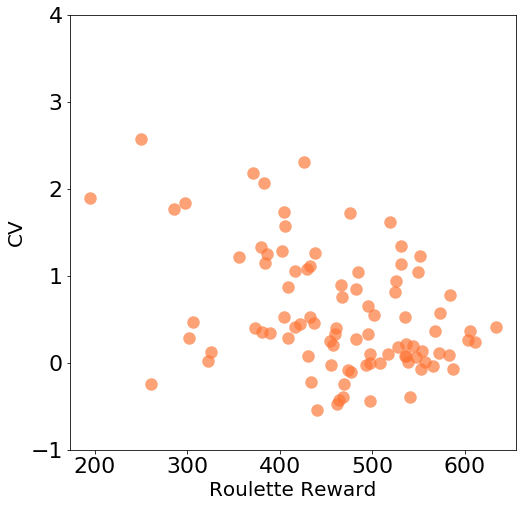

In [414]:
cm = plt.get_cmap('YlOrRd')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 22})
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(8,8))
ccc = np.array([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# print(np.array(all_slope))
# Lower-variance + smaller slope -> higher reward
# larger rsqure + smaller slope
# smaller 1-rsquare + smaller slope -> higher
cv1 = np.multiply(np.sqrt(1-np.array(all_rsq)), np.array(all_slope))
cv1[cv1<-10] = 0
ax.plot(all_score, cv1, marker='.', linestyle='', markersize=25, markeredgecolor='none',
        linewidth=0.5, label=name, color=ccc[22], alpha=0.67)
print(np.corrcoef(all_score, cv1)[0,1])
# plt.yticks(np.arange(0,5,1))
# plt.xticks(np.arange(0,801,400))
ax.set_ylim(-1, 4)
# ax.set_xlim(0,700)
ax.set_xlabel('Roulette Reward',fontsize=20)
ax.set_ylabel('CV',fontsize=20)
plt.savefig('resivar_slope_reward_allplayers.pdf', transparent=True) 

[13 14 29 15 15 15 20 20 38 12 13 26 29 13 14 20 12 12 18 18 21 31 28 20
 31 17 12 17 12 17 18 13 13 21 27 33 13 17 16 14 22 29 12 13 24 21 13 26
 23 20 17 18 28 39 15 15 16 12 30 12 14 15 15 13 16 31 15 19 22 18 12 13
 13 13 33 13 20 26 30 31 22 22 17 13 36 22 12 38 13 24 23]
-0.042250929561385465


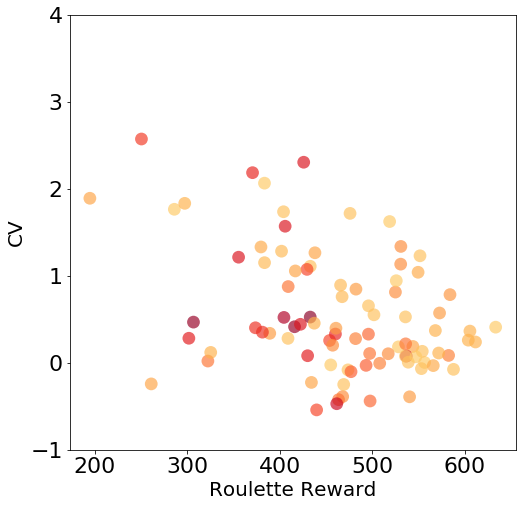

In [426]:
cm = plt.get_cmap('YlOrRd')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 22})
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(8,8))
ccc = np.array([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# print(np.array(all_slope))
# Lower-variance + smaller slope -> higher reward
# larger rsqure + smaller slope
# smaller 1-rsquare + smaller slope -> higher
cv1 = np.multiply(np.sqrt(1-np.array(all_rsq)), np.array(all_slope))
mask = np.logical_and(~np.isnan(all_age), cv1>-5)
agecolor = np.round(all_age / max(all_age)*39)
agecolor = np.array(agecolor,dtype=int)
print(agecolor[mask])
ax.scatter(all_score[mask], cv1[mask], marker='.',s=650, edgecolor='none',
        label=name, color=ccc[agecolor[mask],:], alpha=0.67)
print(np.corrcoef(all_score, cv1)[0,1])
# plt.yticks(np.arange(0,5,1))
# plt.xticks(np.arange(0,801,400))
ax.set_ylim(-1, 4)
# ax.set_xlim(0,700)
ax.set_xlabel('Roulette Reward',fontsize=20)
ax.set_ylabel('CV',fontsize=20)
plt.savefig('resivar_slope_reward_allplayers.pdf', transparent=True) 

0.41070256512952374


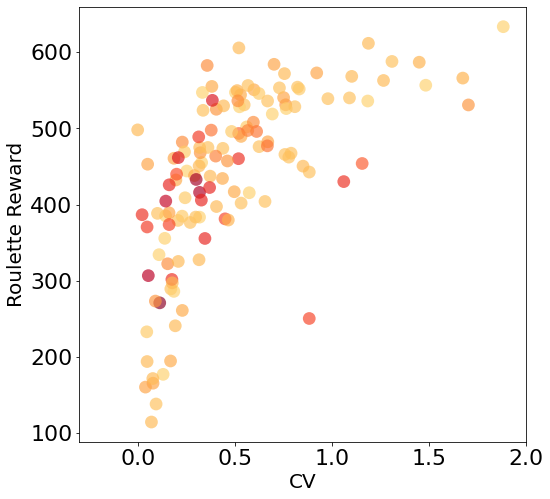

In [187]:
cm = plt.get_cmap('YlOrRd')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 22})
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(8,8))
ccc = np.array([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# print(np.array(all_slope))
# Lower-variance + smaller slope -> higher reward
# larger rsqure + smaller slope
# smaller 1-rsquare + smaller slope -> higher
cv1 = np.multiply(np.sqrt(1-np.array(all_rsq)), np.array(all_slope))
cv1 = np.abs(np.sqrt(all_rsq) /  all_slope/ all_intercept)#/
mask = np.logical_and(~np.isnan(all_age), cv1>-5)
agecolor = np.round(all_age / max(all_age)*39)
agecolor = np.array(agecolor,dtype=int)
ax.scatter(cv1[mask], all_score[mask],  marker='.',s=650, edgecolor='none',
        label=name, color=ccc[agecolor[mask],:], alpha=0.67)
print(np.corrcoef(all_score, cv1)[0,1])
# plt.yticks(np.arange(0,5,1))
# plt.xticks(np.arange(0,801,400))
# ax.set_ylim(-2, 2)
ax.set_xlim(-0.3,2)
ax.set_xlabel('CV',fontsize=20)
ax.set_ylabel('Roulette Reward',fontsize=20)
plt.savefig('resivar_slope_reward_allplayers.pdf', transparent=True) 

(-5.0, 5.0)

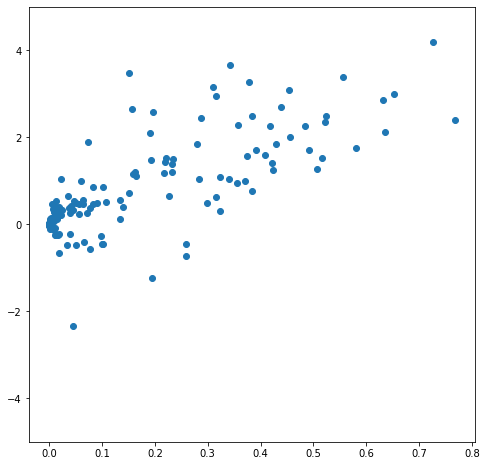

In [23]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(all_rsq, all_slope)
plt.ylim(-5,5)

(-5.0, 5.0)

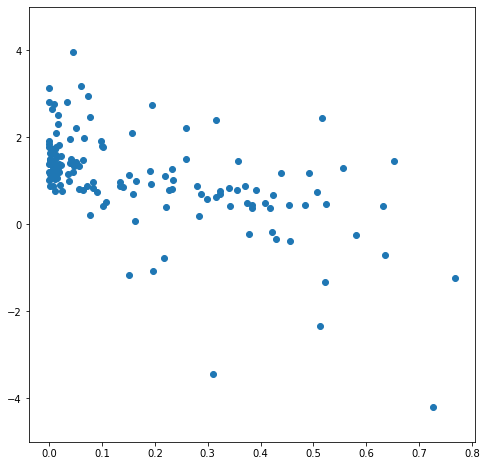

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(all_rsq, all_intercept)
plt.ylim(-5,5)

(-5.0, 5.0)

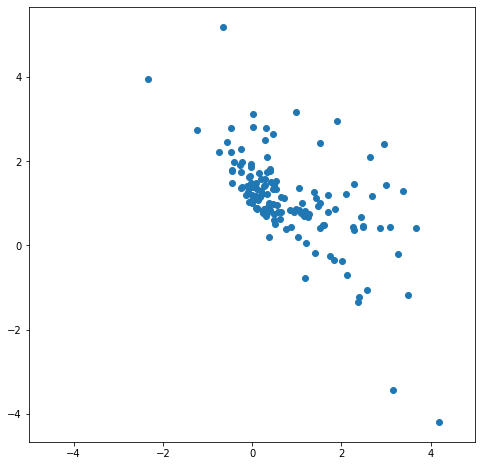

In [26]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(all_slope, all_intercept)
plt.xlim(-5,5)

Text(0, 0.5, '$R^2$')

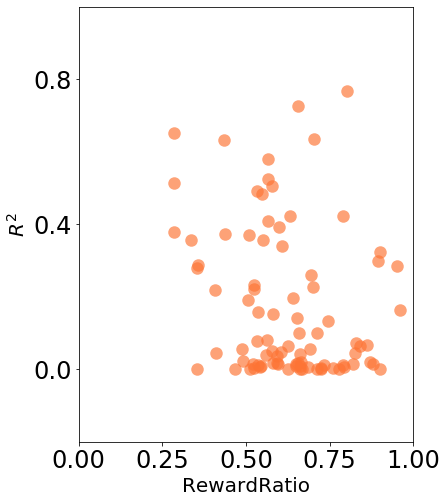

In [148]:
cm = plt.get_cmap('YlOrRd')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 24})
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(6,8))
ccc = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
ax.plot(all_rewardratio, all_rsq, marker='.', linestyle='', markersize=25, markeredgecolor='none',
        linewidth=0.5, label=name, color=ccc[22], alpha=0.67)
plt.yticks(np.arange(0,1.5,0.4))
# plt.xticks(np.arange(0,801,400))
ax.set_ylim(-0.2, 1)
ax.set_xlim(0,1)
ax.set_xlabel('RewardRatio',fontsize=20)
ax.set_ylabel('$R^2$',fontsize=20)
# plt.savefig('Rsq_Reward_allplayers.pdf', transparent=True) 

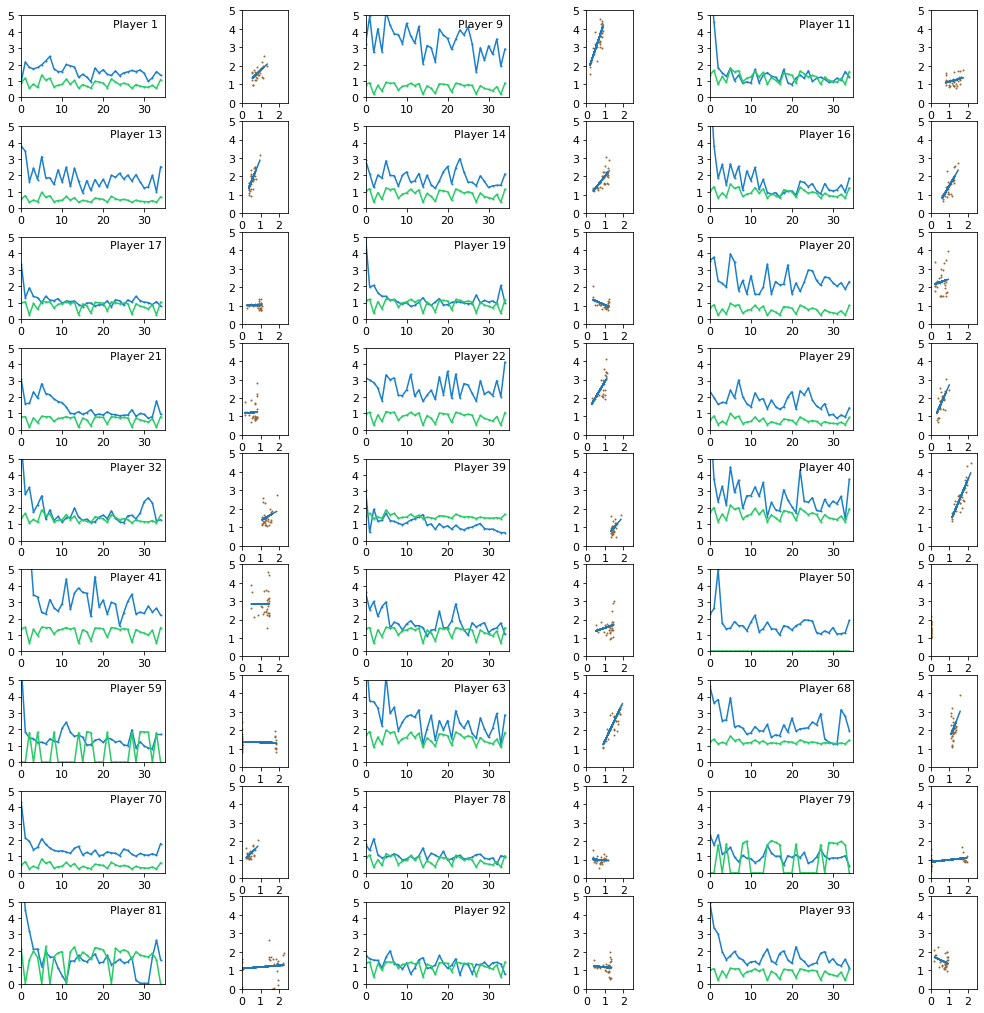

In [59]:
fig, ax = plt.subplots(nrows=9, ncols=6, figsize=(18,18))
fig.subplots_adjust(hspace=0.2)
# fig.subplots_adjust(wspace=-0.5)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 11})
groups = df_roulette_all.groupby('username')
tcur=[1, 9, 11, 13, 14, 16, 17, 19, 20, 21, 22, 29, 32, 39, 40, 41, 42, 50, 59, 63, 68, 70, 78, 79, 81, 92, 93]
t=0
for name, group in groups:
    if t in tcur:
        ind = tcur.index(t)
        p, q = ind//3, ind%3
        usedname = name
        ax[p,2*q].plot(group.numtrial, group.time, marker='o', linestyle='-', ms=1, 
                label=name, color=[0.1,0.5,0.8])
        ax[p,2*q].plot(group.numtrial, group.best_time, marker='s',linestyle='-',ms=1,
               color=[0.15,0.8,0.4])
        ax[p,2*q].set_ylim(0,5)
        ax[p,2*q].set_xlim(0,35)
        #ax[p,2*q].set_title(t)
        ax[p,2*q].set_yticks([0,1,2,3,4,5])
        ax[p,2*q].set_xticks([0,10,20,30])
        ax[p,2*q].set_aspect(4)
        ax[p,2*q].text(28, 4.5, 'Player '+str(t), horizontalalignment='center',
             verticalalignment='center')
        
        x = group.best_time.to_numpy()[5:].reshape(-1,1)
        y = group.time.to_numpy()[5:]
        model = LinearRegression(fit_intercept=True).fit(x, y)
        ax[p,2*q+1].plot(x, y, marker='o', linestyle='', ms=1, 
                label=name, color=[0.6,0.4,0.2])
        ax[p,2*q+1].plot(x, model.coef_ * x + model.intercept_)
        ax[p,2*q+1].set_ylim(0,5)
        ax[p,2*q+1].set_xlim(0,2.5)
        ax[p,2*q+1].set_aspect(1)
        #ax[p,2*q+1].set_title(t)
        ax[p,2*q+1].set_yticks([0,1,2,3,4,5])
        ax[p,2*q+1].set_xticks([0,1,2])
    t = t+1

# ax.set_yticks([0,1,2,3,4,5])
# ax.set_xticks([0,10,20,30])
# ax.legend(['Bet_time','Best_time','Omega_0'], loc='upper left')
# ax.set_title(usedname)
plt.savefig('Betting_Time_AllUser.pdf', transparent=True) 

#### Age/Gender/Handedness vs performance

In [109]:
groups = df_roulette_all.groupby('username')
all_age = []
all_gender = []
all_edu = []
all_handed = []
all_score = []
for name, group in groups:
    try:
        int(df_info[(df_info.Usr_Name==name) & (df_info.InfoType=='Age')].InfoData.to_numpy()[0])
        int(df_info[(df_info.Usr_Name==name) & (df_info.InfoType=='Edu')].InfoData.to_numpy()[0])
        df_info[(df_info.Usr_Name==name) & (df_info.InfoType=='Gender')].InfoData.to_numpy()[0]
        df_info[(df_info.Usr_Name==name) & (df_info.InfoType=='Gender')].InfoData.to_numpy()[0]
        all_age.append(int(df_info[(df_info.Usr_Name==name) & (df_info.InfoType=='Age')].InfoData.to_numpy()[0]))
        all_gender.append(df_info[(df_info.Usr_Name==name) & (df_info.InfoType=='Gender')].InfoData.to_numpy()[0])
        all_edu.append(int(df_info[(df_info.Usr_Name==name) & (df_info.InfoType=='Edu')].InfoData.to_numpy()[0]))
        all_handed.append(df_info[(df_info.Usr_Name==name) & (df_info.InfoType=='Hand')].InfoData.to_numpy()[0])
        all_score.append(group.reward.to_numpy()[10:].mean())
    except:
        1

In [81]:
groups = df_roulette_all.groupby('username')
all_age = []
all_gender = []
all_edu = []
all_handed = []
all_score = []
for name, group in groups:
    try:
        all_age.append(int(df_info[(df_info.Usr_Name==name) & (df_info.InfoType=='Age')].InfoData.to_numpy()[0]))
    except: 
        all_age.append(np.nan)
    try:
        all_edu.append(int(df_info[(df_info.Usr_Name==name) & (df_info.InfoType=='Edu')].InfoData.to_numpy()[0]))
    except:
        all_edu.append(np.nan)
    try:
        all_gender.append(df_info[(df_info.Usr_Name==name) & (df_info.InfoType=='Gender')].InfoData.to_numpy()[0])
    except:
        all_gender.append(np.nan)
    try:
        all_handed.append(df_info[(df_info.Usr_Name==name) & (df_info.InfoType=='Hand')].InfoData.to_numpy()[0])
    except:
        all_handed.append(np.nan)
    all_score.append(group.reward.to_numpy()[15:].mean())
all_age = np.array(all_age)
all_gender = np.array(all_gender)
all_edu = np.array(all_edu)
all_handed = np.array(all_handed)
all_score = np.array(all_score)

-0.29726455844084576


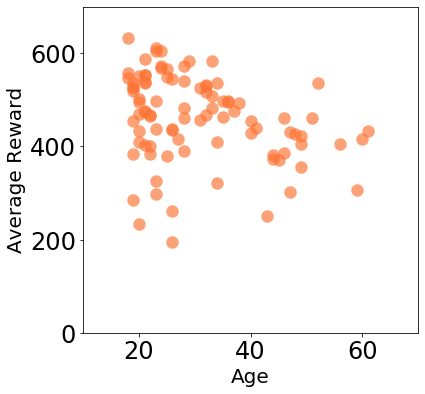

In [342]:
cm = plt.get_cmap('YlOrRd')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 24})
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(6,6))
# fig, ax = plt.subplots(figsize=(6,8))
mask = ~np.isnan(all_age)
print(np.corrcoef(np.array(all_age[mask]), np.array(all_score[mask]))[0,1])
ccc = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
ax.plot(all_age, all_score, marker='.', linestyle='', markersize=25, markeredgecolor='none',
        linewidth=0.5, label=name, color=ccc[22], alpha=0.67)
# plt.yticks(np.arange(0,1.5,0.4))
# plt.xticks(np.arange(0,801,400))
ax.set_ylim(0, 700)
ax.set_xlim(10,70)
ax.set_xlabel('Age',fontsize=20)
ax.set_ylabel('Average Reward',fontsize=20)
plt.savefig('Reward_Age_allplayers.pdf', transparent=True) 

-0.13575196062630795


Text(0, 0.5, 'Average Reward')

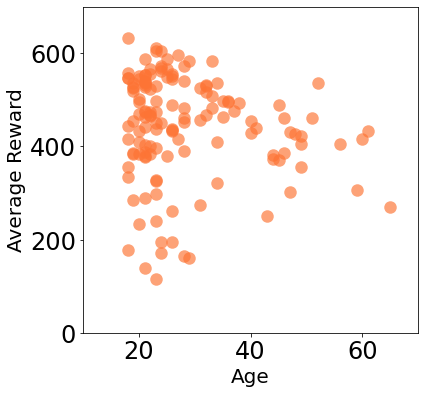

In [119]:
cm = plt.get_cmap('YlOrRd')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 24})
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(6,6))
# fig, ax = plt.subplots(figsize=(6,8))
mask = ~np.isnan(all_age)
print(np.corrcoef(np.array(all_age[mask]), np.array(all_score[mask]))[0,1])
ccc = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
ax.plot(all_age, all_score, marker='.', linestyle='', markersize=25, markeredgecolor='none',
        linewidth=0.5, label=name, color=ccc[22], alpha=0.67)
# plt.yticks(np.arange(0,1.5,0.4))
# plt.xticks(np.arange(0,801,400))
ax.set_ylim(0, 700)
ax.set_xlim(10,70)
ax.set_xlabel('Age',fontsize=20)
ax.set_ylabel('Average Reward',fontsize=20)
# plt.savefig('Reward_Age_allplayers.pdf', transparent=True) 

62 32
1.7167839314641087 0.08938368907422087


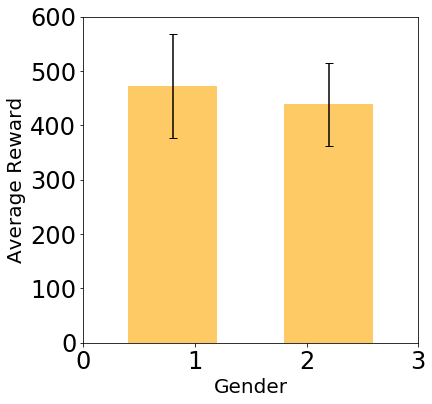

In [474]:
cm = plt.get_cmap('YlOrRd')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 24})
mpl.rcParams.update({'errorbar.capsize': 4})
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(6,6))
# fig, ax = plt.subplots(figsize=(6,8))
ccc = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
male_score = np.array([all_score[i] for i in range(len(all_score)) if all_gender[i]=='Male'])
female_score=np.array([all_score[i] for i in range(len(all_score)) if all_gender[i]=='Female'])
print(len(male_score), len(female_score))
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
plt.bar([0.8,2.2], [np.mean(male_score), np.mean(female_score)], yerr=[np.std(male_score),np.std(female_score)],
       color=ccc[12])#, marker='.', linestyle='', markersize=25, markeredgecolor='none',
t, p = ttest_ind(male_score, female_score)
print(t, p)
ax.set_ylim(0, 600)
ax.set_xlim(0,3)
ax.set_xlabel('Gender',fontsize=20)
ax.set_ylabel('Average Reward',fontsize=20)
plt.savefig('Reward_Gender_allplayers.pdf', transparent=True) 

92 50
3.2871596967612637 0.001279520841308799


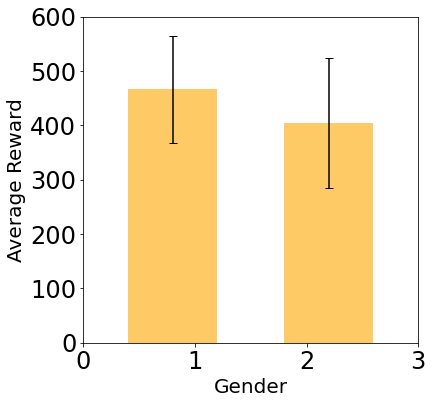

In [120]:
cm = plt.get_cmap('YlOrRd')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 24})
mpl.rcParams.update({'errorbar.capsize': 4})
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(6,6))
# fig, ax = plt.subplots(figsize=(6,8))
ccc = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
male_score = np.array([all_score[i] for i in range(len(all_score)) if all_gender[i]=='Male'])
female_score=np.array([all_score[i] for i in range(len(all_score)) if all_gender[i]=='Female'])
print(len(male_score), len(female_score))
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
plt.bar([0.8,2.2], [np.mean(male_score), np.mean(female_score)], yerr=[np.std(male_score),np.std(female_score)],
       color=ccc[12])#, marker='.', linestyle='', markersize=25, markeredgecolor='none',
t, p = ttest_ind(male_score, female_score)
print(t, p)
ax.set_ylim(0, 600)
ax.set_xlim(0,3)
ax.set_xlabel('Gender',fontsize=20)
ax.set_ylabel('Average Reward',fontsize=20)
plt.savefig('Reward_Gender_allplayers.pdf', transparent=True) 

80 14
0.844416907281735 0.4006269590278694


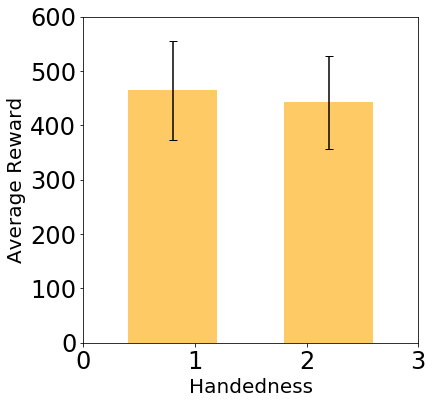

In [477]:
cm = plt.get_cmap('YlOrRd')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 24})
mpl.rcParams.update({'errorbar.capsize': 4})
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(6,6))
# fig, ax = plt.subplots(figsize=(6,8))
ccc = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
right_score = np.array([all_score[i] for i in range(len(all_score)) if all_handed[i]=='Right-handed'])
left_score=np.array([all_score[i] for i in range(len(all_score)) if all_handed[i]=='Left-handed'])
print(len(right_score), len(left_score))
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
c=plt.bar([0.8,2.2], [np.mean(right_score), np.mean(left_score)], yerr=[np.std(right_score),np.std(left_score)],
       color=ccc[12])#, marker='.', linestyle='', markersize=25, markeredgecolor='none',
t, p = ttest_ind(right_score, left_score)
print(t, p)
# plt.yticks(np.arange(0,1.5,0.4))
# plt.xticks(np.arange(0,801,400))
ax.set_ylim(0,600)
ax.set_xlim(0,3)
ax.set_xlabel('Handedness',fontsize=20)
ax.set_ylabel('Average Reward',fontsize=20)
plt.savefig('Reward_Handed_allplayers.pdf', transparent=True) 

-0.01735267635670064


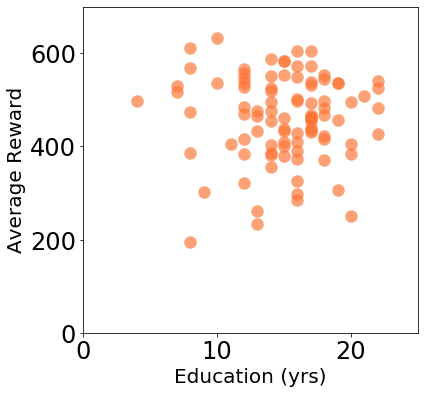

In [346]:
cm = plt.get_cmap('YlOrRd')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 24})
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(6,6))
ccc = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
mask = ~np.isnan(all_edu)
print(np.corrcoef(np.array(all_edu[mask]), np.array(all_score[mask]))[0,1])
ax.plot(all_edu, all_score, marker='.', linestyle='', markersize=25, markeredgecolor='none',
        linewidth=0.5, label=name, color=ccc[22], alpha=0.67)
# plt.yticks(np.arange(0,1.5,0.4))
# plt.xticks(np.arange(0,801,400))
ax.set_ylim(0, 700)
ax.set_xlim(0,25)
ax.set_xlabel('Education (yrs)',fontsize=20)
ax.set_ylabel('Average Reward',fontsize=20)
plt.savefig('Reward_Edu_allplayers.pdf', transparent=True) 

### Learning curves for each user

In [279]:
len(male_score)

61

In [280]:
len(right_score)

78

In [162]:
# Function for learning curve:
def func(x, tau, maxlevel):
    return maxlevel*(1.-np.exp(-x/tau))

/anaconda2/envs/ipykernal_py3/lib/python3.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


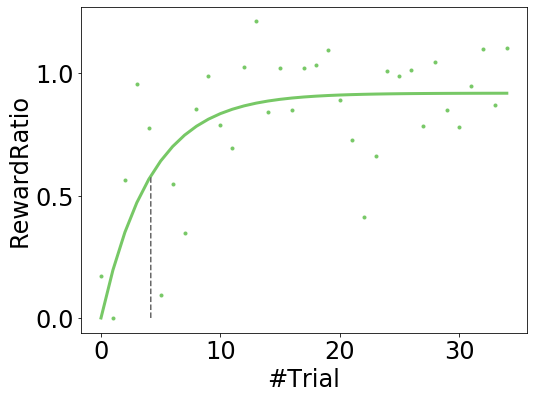

In [265]:
groups = df_roulette_all.groupby('username')
t = 0
figure, ax = plt.subplots(figsize=(8,6))
all_lspeed = []
tt=7
for name, group in groups:
    score = group.rewardratio.to_numpy()
    try:
        popt, pcov = curve_fit(func, list(range(35)), score, p0=(6, 0.8))
    except:
        popt = [3,0.8]
    xx = np.arange(0,35)
    yy = func(xx, *popt)
    all_lspeed.append(popt[0])
    if t==4:
        plt.plot(list(range(35)), score,'.',color=[tt/15,tt/12+0.2,-0.1*tt+1.1])
        plt.plot(xx, yy,color=[tt/15,tt/12+0.2,-0.1*tt+1.1],linewidth=3)
    t+=1
plt.yticks([0,0.5,1])
# ax.set_yticklabels(['0.0','0.5','1.0'])
plt.plot([4.17,4.171],[0,0.58],'--',color=[0.4,0.4,0.4])
# plt.legend(['Player 4'])
plt.xlabel('#Trial')
plt.ylabel('RewardRatio')
figure.savefig('LearningPlayer4.pdf')

Text(0, 0.5, 'Learning Time')

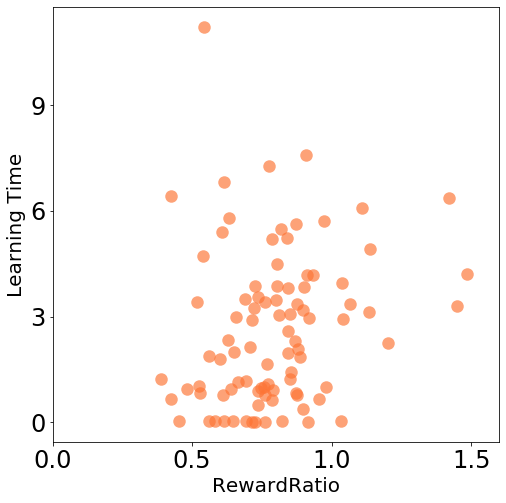

In [266]:
cm = plt.get_cmap('YlOrRd')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 24})
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(8,8))
ccc = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
ax.plot(all_rewardratio, all_lspeed, marker='.', linestyle='', markersize=25, markeredgecolor='none',
        linewidth=0.5, label=name, color=ccc[22], alpha=0.67)
plt.yticks(np.arange(0,10,3))
# plt.xticks(np.arange(0,801,400))
# ax.set_ylim(0, 11)
ax.set_xlim(0,1.6)
ax.set_xlabel('RewardRatio',fontsize=20)
ax.set_ylabel('Learning Time',fontsize=20)
# plt.savefig('LearningTime_RewardRatio_allplayers.pdf', transparent=True) 

Text(0, 0.5, 'Learning Time')

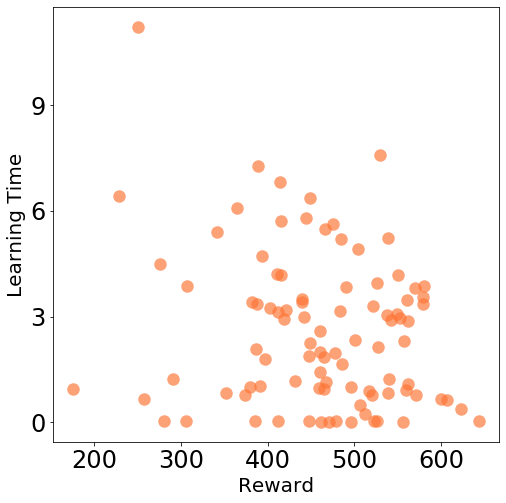

In [269]:
cm = plt.get_cmap('YlOrRd')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 24})
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(8,8))
ccc = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
ax.plot(all_score, all_lspeed, marker='.', linestyle='', markersize=25, markeredgecolor='none',
        linewidth=0.5, label=name, color=ccc[22], alpha=0.67)
plt.yticks(np.arange(0,10,3))
# plt.xticks(np.arange(0,801,400))
# ax.set_ylim(0, 11)
# ax.set_xlim(0,1.6)
ax.set_xlabel('Reward',fontsize=20)
ax.set_ylabel('Learning Time',fontsize=20)
# plt.savefig('LearningTime_RewardRatio_allplayers.pdf', transparent=True) 

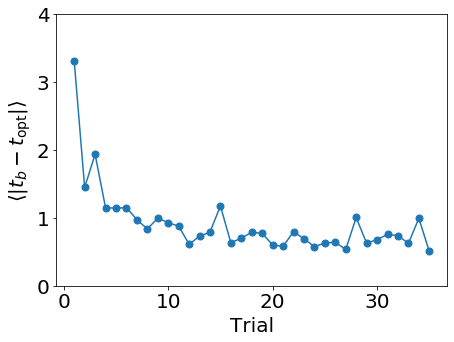

In [101]:
fig, ax = plt.subplots(figsize=(7,5))
# xx=df_roulette_all.groupby('numtrial').mean()['time'][:25]
yy =df_roulette_all.groupby('numtrial').median()['timedifference']
# yy2=df_roulette_all.groupby('numtrial').mean()['best_time'][:25]
ax.plot(range(1,36), yy, marker='o', linestyle='-', ms=7, 
                label=name)

#ax.legend(numpoints=1)
ax.set_ylim(0,4)
# ax.set_xlim(0,25)
ax.set_xlabel('Trial',fontsize=20)
ax.set_ylabel(r'$\langle |t_b - t_{\rm opt} | \rangle$',fontsize=20)#  / $\omega_0$
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend(['Bet_time','Best_time','Omega_0'])
fig.savefig('Plots/TimeDifferenceVsNumTrial.pdf')

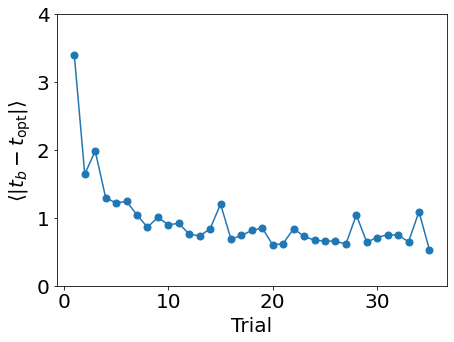

In [121]:
fig, ax = plt.subplots(figsize=(7,5))
# xx=df_roulette_all.groupby('numtrial').mean()['time'][:25]
yy =df_roulette_all.groupby('numtrial').median()['timedifference']
# yy2=df_roulette_all.groupby('numtrial').mean()['best_time'][:25]
ax.plot(range(1,36), yy, marker='o', linestyle='-', ms=7, 
                label=name)

#ax.legend(numpoints=1)
ax.set_ylim(0,4)
# ax.set_xlim(0,25)
ax.set_xlabel('Trial',fontsize=20)
ax.set_ylabel(r'$\langle |t_b - t_{\rm opt} | \rangle$',fontsize=20)#  / $\omega_0$
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend(['Bet_time','Best_time','Omega_0'])
fig.savefig('Plots/TimeDifferenceVsNumTrial.pdf')

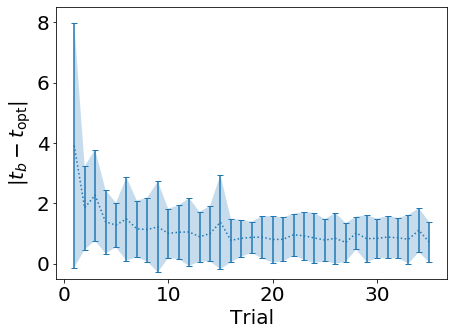

In [18]:
fig, ax = plt.subplots(figsize=(7,5))
yy =df_roulette_all.groupby('numtrial').mean()['timedifference']
e =df_roulette_all.groupby('numtrial').std()['timedifference']
ax.set_ylim(-0.5,8.5)
# ax.set_xlim(0,25)
ax.errorbar(range(1,36), yy, yerr=e, fmt=':', capsize=3, capthick=1)
ax.fill_between(range(1,36), yy-e, yy+e, alpha=0.25)
ax.set_xlabel('Trial',fontsize=20)
ax.set_ylabel(r'$|t_b - t_{\rm opt} |$',fontsize=20)#  / $\omega_0$
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend(['Bet_time','Best_time','Omega_0'])
fig.savefig('Plots/TimeDifferenceVsNumTrial.pdf')

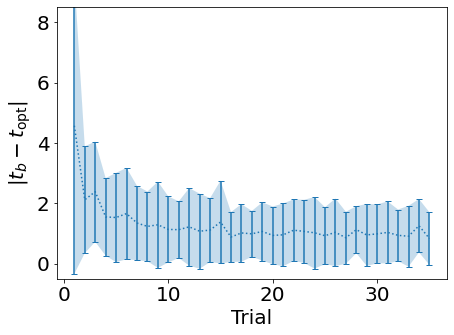

In [171]:
fig, ax = plt.subplots(figsize=(7,5))
yy =df_roulette_all.groupby('numtrial').mean()['timedifference']
e =df_roulette_all.groupby('numtrial').std()['timedifference']
ax.set_ylim(-0.5,8.5)
# ax.set_xlim(0,25)
ax.errorbar(range(1,36), yy, yerr=e, fmt=':', capsize=3, capthick=1)
ax.fill_between(range(1,36), yy-e, yy+e, alpha=0.25)
ax.set_xlabel('Trial',fontsize=20)
ax.set_ylabel(r'$|t_b - t_{\rm opt} |$',fontsize=20)#  / $\omega_0$
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend(['Bet_time','Best_time','Omega_0'])
fig.savefig('Plots/TimeDifferenceVsNumTrial.pdf')

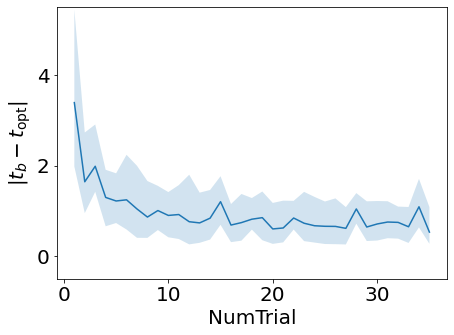

In [77]:
fig, ax = plt.subplots(figsize=(7,5))
yy =df_roulette_all.groupby('numtrial').mean()['timedifference']
e =df_roulette_all.groupby('numtrial').std()['timedifference']
ax.set_ylim(-0.5,5.5)
plt.yticks(np.arange(0,6,2))
# ax.set_xlim(0,25)
# ax.errorbar(range(1,36), yy, yerr=e, fmt=':', capsize=3, capthick=1)

median1 = df_roulette_all.groupby('numtrial').median()['timedifference']
upper = df_roulette_all.groupby('numtrial').quantile(0.75)['timedifference']
lower = df_roulette_all.groupby('numtrial').quantile(0.25)['timedifference']
plt.plot(range(1,36), median1)
plt.fill_between(range(1,36), lower, upper, alpha=0.2)

# ax.fill_between(range(1,36), yy-e, yy+e, alpha=0.25)
ax.set_xlabel('NumTrial',fontsize=20)
ax.set_ylabel(r'$|t_b - t_{\rm opt} |$',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend(['Bet_time','Best_time','Omega_0'])
fig.savefig('Plots/TimeDifferenceVsNumTrial.pdf')

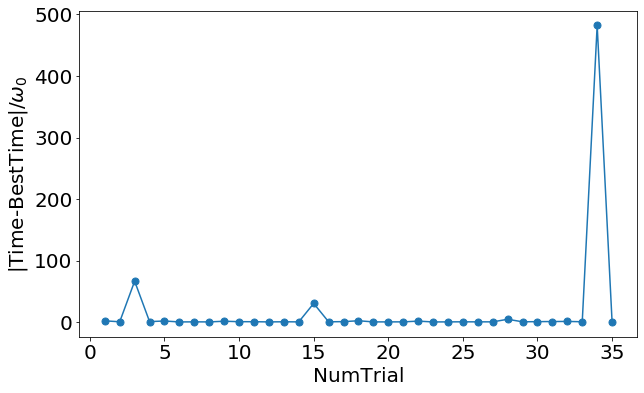

In [50]:
fig, ax = plt.subplots(figsize=(10,6))
# xx=df_roulette_all.groupby('numtrial').mean()['time'][:25]
yy =df_roulette_all.groupby('numtrial').mean()['timedifference']
yy = yy/df_roulette_all.groupby('numtrial').mean()['omegainitabs']
# yy2=df_roulette_all.groupby('numtrial').mean()['best_time'][:25]
ax.plot(range(1,36), yy, marker='o', linestyle='-', ms=7, 
                label=name)

#ax.legend(numpoints=1)
# ax.set_ylim(0,6)
# ax.set_xlim(0,25)
ax.set_xlabel('NumTrial',fontsize=20)
ax.set_ylabel('|Time-BestTime|/$\omega_0$',fontsize=20)#  / $\omega_0$
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend(['Bet_time','Best_time','Omega_0'])
# fig.savefig('Plots/TimeDifferenceVsNumTrial.pdf')

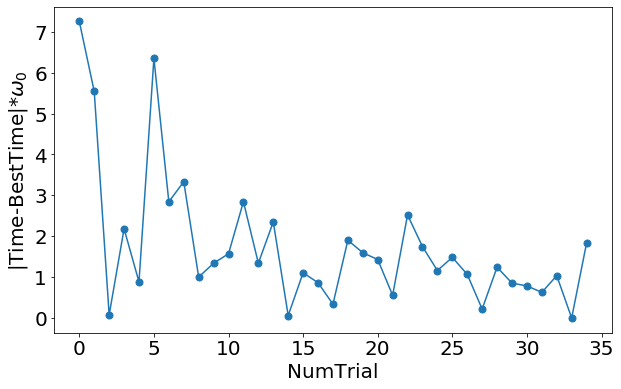

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
# xx=df_roulette_all.groupby('numtrial').mean()['time'][:25]
yy =df_roulette_all.groupby('numtrial').mean()['timedifference']
# yy = yy/df_roulette_all.groupby('numtrial').mean()['omegainitabs']
# yy2=df_roulette_all.groupby('numtrial').mean()['best_time'][:25]
ax.plot(range(35), df_roulette_all.groupby('numtrial').mean()['omegainitabs']*yy, marker='o', linestyle='-', ms=7, 
                label=name)

#ax.legend(numpoints=1)
# ax.set_ylim(0,6)
# ax.set_xlim(0,25)
ax.set_xlabel('NumTrial',fontsize=20)
ax.set_ylabel('|Time-BestTime|*$\omega_0$',fontsize=20)#  / $\omega_0$
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend(['Bet_time','Best_time','Omega_0'])
# fig.savefig('Plots/TimeDifferenceVsNumTrial.pdf')

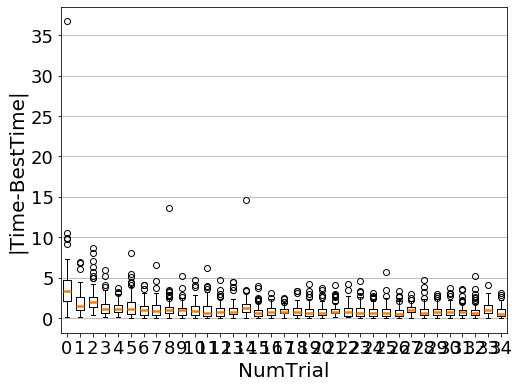

In [52]:
position = range(35)#df_roulette_all.groupby('numtrial').mean()['omegainitabs']#.sort_values()
medianprops = dict(linestyle='-.', linewidth=2.5)
fig1, ax1 = plt.subplots(figsize=(8,6))
_=ax1.boxplot(df_roulette_all['timedifference'].values.reshape(num_qual,35), positions=position, widths=0.62*np.ones((35,)),
             medianprops=medianprops)
# _=plt.xticks(np.arange(0,6,1),('0','1','2','3','4','5','6'))
# _=plt.xlim((-3.5,3.5))
# _=plt.ylim((-3,3))
_=plt.ylabel('|Time-BestTime|',fontsize=20)
_=plt.xlabel('NumTrial',fontsize=20)
_=plt.grid(axis='y')

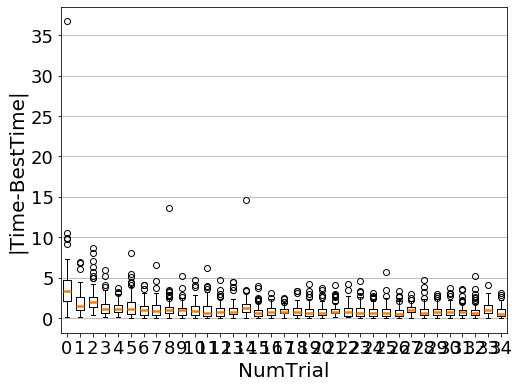

In [53]:
position = range(35)#df_roulette_all.groupby('numtrial').mean()['omegainitabs']#.sort_values()
medianprops = dict(linestyle='-.', linewidth=2.5)
fig1, ax1 = plt.subplots(figsize=(8,6))
y = df_roulette_all['timedifference'].values#*df_roulette_all['omegainitabs'].values
y = y.reshape(num_qual,35)
_=ax1.boxplot(y, positions=position, widths=0.62*np.ones((35,)),
             medianprops=medianprops)
# _=plt.xticks(np.arange(0,6,1),('0','1','2','3','4','5','6'))
# _=plt.xlim((-3.5,3.5))
# _=plt.ylim((0,7))
_=plt.ylabel('|Time-BestTime|',fontsize=20)#*$\omega_0
_=plt.xlabel('NumTrial',fontsize=20)
_=plt.grid(axis='y')

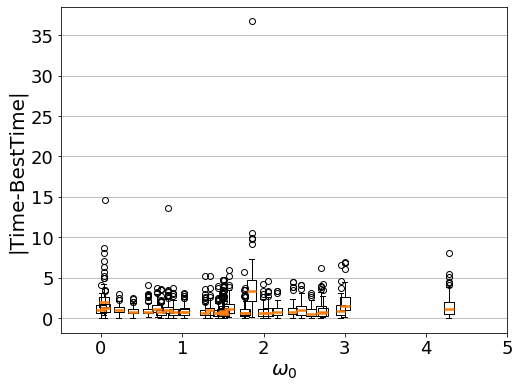

In [54]:
position = df_roulette_all.groupby('numtrial').mean()['omegainitabs']#.sort_values()
medianprops = dict(linestyle='-.', linewidth=2.5)
fig1, ax1 = plt.subplots(figsize=(8,6))
_=ax1.boxplot(df_roulette_all['timedifference'].values.reshape(num_qual,35), positions=position, widths=0.12*np.ones((35,)),
             medianprops=medianprops)
_=plt.xticks(np.arange(0,6,1),('0','1','2','3','4','5','6'))
# _=plt.xlim((-3.5,3.5))
# _=plt.ylim((-3,3))
_=plt.ylabel('|Time-BestTime|',fontsize=20)
_=plt.xlabel('$\omega_0$',fontsize=20)
_=plt.grid(axis='y')

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


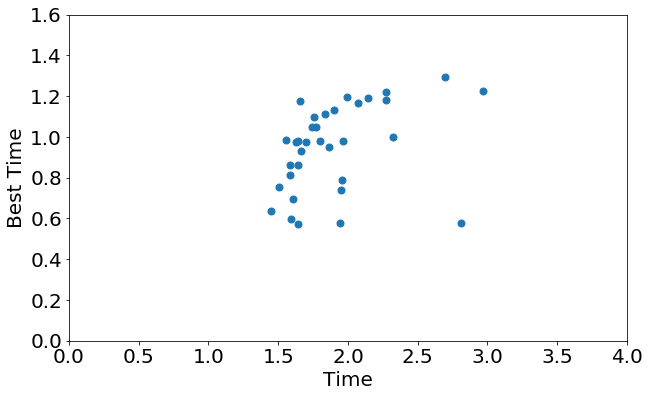

In [55]:
fig, ax = plt.subplots(figsize=(10,6))
xx=df_roulette_all.groupby('numtrial').mean()['time']
yy =df_roulette_all.groupby('numtrial').mean()['best_time']
# yy2=df_roulette_all.groupby('numtrial').mean()['best_time'][:25]
ax.plot(xx, yy, marker='o', linestyle='', ms=7, 
                label=name)

#ax.legend(numpoints=1)
ax.set_ylim(0,1.6)
ax.set_xlim(0,4)
ax.set_xlabel('Time',fontsize=20)
ax.set_ylabel('Best Time',fontsize=20)#  / $\omega_0$
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend(['Bet_time','Best_time','Omega_0'])
# fig.savefig('Plots/TimeDifferenceVsNumTrial.pdf')

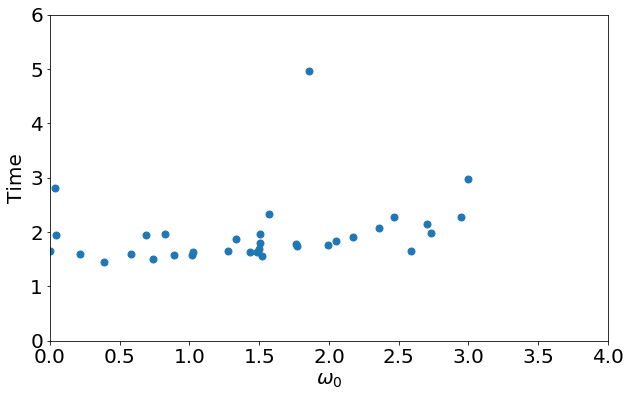

In [56]:
fig, ax = plt.subplots(figsize=(10,6))
xx=df_roulette_all.groupby('numtrial').mean()['omegainitabs']
yy =df_roulette_all.groupby('numtrial').mean()['time']
# yy2=df_roulette_all.groupby('numtrial').mean()['best_time'][:25]
ax.plot(xx, yy, marker='o', linestyle='', ms=7, 
                label=name)

#ax.legend(numpoints=1)
ax.set_ylim(0,6)
ax.set_xlim(0,4)
ax.set_xlabel('$\omega_0$',fontsize=20)
ax.set_ylabel('Time',fontsize=20)#  / $\omega_0$
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend(['Bet_time','Best_time','Omega_0'])
# fig.savefig('Plots/TimeDifferenceVsNumTrial.pdf')

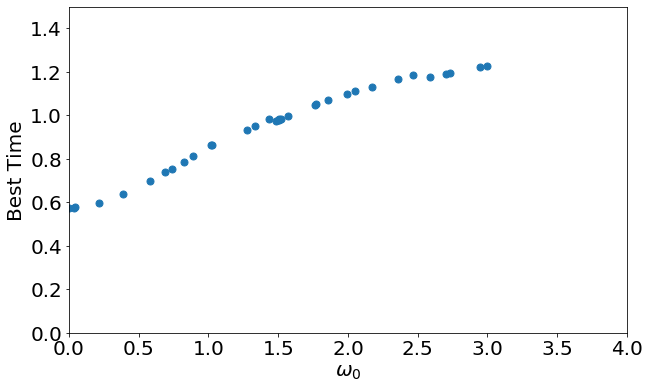

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
xx=df_roulette_all.groupby('numtrial').mean()['omegainitabs']
yy =df_roulette_all.groupby('numtrial').mean()['best_time']
# yy2=df_roulette_all.groupby('numtrial').mean()['best_time'][:25]
ax.plot(xx, yy, marker='o', linestyle='', ms=7, 
                label=name)

#ax.legend(numpoints=1)
ax.set_ylim(0,1.5)
ax.set_xlim(0,4)
ax.set_xlabel('$\omega_0$',fontsize=20)
ax.set_ylabel('Best Time',fontsize=20)#  / $\omega_0$
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend(['Bet_time','Best_time','Omega_0'])
# fig.savefig('Plots/TimeDifferenceVsNumTrial.pdf')

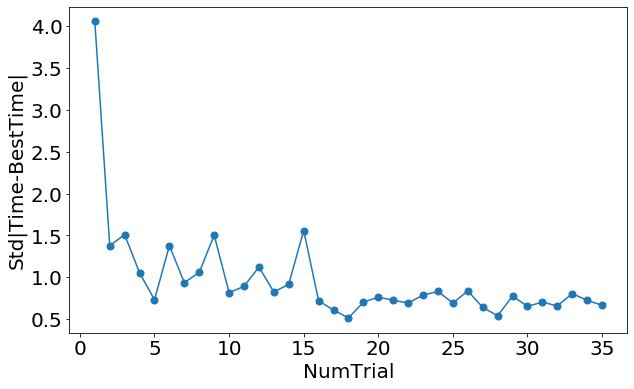

In [60]:
fig, ax = plt.subplots(figsize=(10,6))
# xx=df_roulette_all.groupby('numtrial').mean()['time'][:25]
yy =df_roulette_all.groupby('numtrial').std()['timedifference']
# yy2=df_roulette_all.groupby('numtrial').mean()['best_time'][:25]
ax.plot(range(1,36), yy, marker='o', linestyle='-', ms=7, 
                label=name)

#ax.legend(numpoints=1)
# ax.set_ylim(0,2)
# ax.set_xlim(0,25)
ax.set_xlabel('NumTrial',fontsize=20)
ax.set_ylabel('Std|Time-BestTime|',fontsize=20)#  / $\omega_0$
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend(['Bet_time','Best_time','Omega_0'])
# fig.savefig('Plots/TimeDifferenceVsNumTrial.pdf')

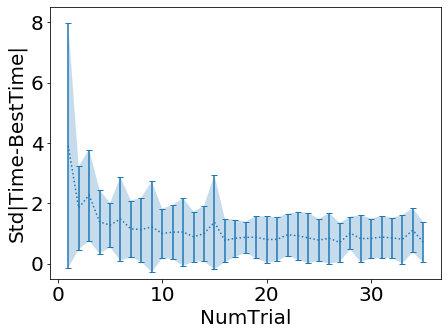

In [97]:
fig, ax = plt.subplots(figsize=(7,5))
yy =df_roulette_all.groupby('numtrial').mean()['timedifference']
e =df_roulette_all.groupby('numtrial').std()['timedifference']
ax.set_ylim(-0.5,8.5)
# ax.set_xlim(0,25)
ax.errorbar(range(1,36), yy, yerr=e, fmt=':', capsize=3, capthick=1)
ax.fill_between(range(1,36), yy-e, yy+e, alpha=0.25)
ax.set_xlabel('NumTrial',fontsize=20)
ax.set_ylabel('Std|Time-BestTime|',fontsize=20)#  / $\omega_0$
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend(['Bet_time','Best_time','Omega_0'])
fig.savefig('Plots/TimeDifferenceVsNumTrial.pdf')

### Error and time as a function of initial speed ($\omega_0$)

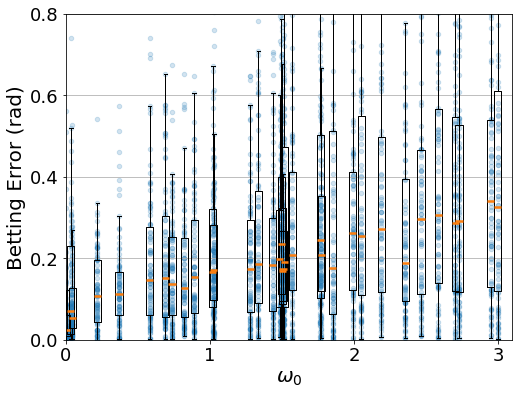

In [61]:
position = df_roulette_all.groupby('numtrial').first()['omegainitabs']
medianprops = dict(linestyle='-.', linewidth=2.5)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 18})
fig1, ax1 = plt.subplots(figsize=(8,6))
df_roulette_all.plot.scatter(x='omegainitabs',y='bettingerror',ax=ax1,alpha=0.2)
_=ax1.boxplot(df_roulette_all['bettingerror'].values.reshape(num_qual,35), positions=position, widths=0.05*np.ones((35,)),
             medianprops=medianprops, showfliers=False, meanline=False)
plt.xticks(np.arange(0,4.1,1),('0','1','2','3','4'))
plt.yticks(np.arange(0,0.85,0.2))
plt.xlim((0,3.1))
_=plt.ylim((0,0.8))
_=plt.ylabel('Betting Error (rad)',fontsize=20)
_=plt.xlabel('$\omega_0$',fontsize=20)
_=plt.grid(axis='y')
plt.savefig('BettingErr_Omegainit.pdf', transparent=True)  

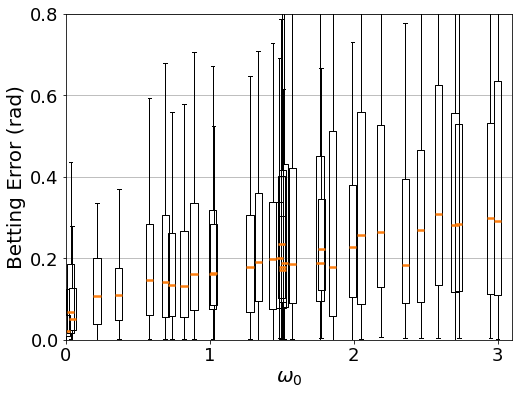

In [182]:
position = df_roulette_all.groupby('numtrial').first()['omegainitabs']
medianprops = dict(linestyle='-.', linewidth=2.5)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 18})
fig1, ax1 = plt.subplots(figsize=(8,6))
# df_roulette_all.plot.scatter(x='omegainitabs',y='bettingerror',ax=ax1,alpha=0.2)
_=ax1.boxplot(df_roulette_all['bettingerror'].values.reshape(num_qual,35), positions=position, widths=0.05*np.ones((35,)),
             medianprops=medianprops, showfliers=False, meanline=False)
plt.xticks(np.arange(0,4.1,1),('0','1','2','3','4'))
plt.yticks(np.arange(0,0.85,0.2))
plt.xlim((0,3.1))
_=plt.ylim((0,0.8))
_=plt.ylabel('Betting Error (rad)',fontsize=20)
_=plt.xlabel('$\omega_0$',fontsize=20)
_=plt.grid(axis='y')
plt.savefig('BettingErr_Omegainit.pdf', transparent=True)  

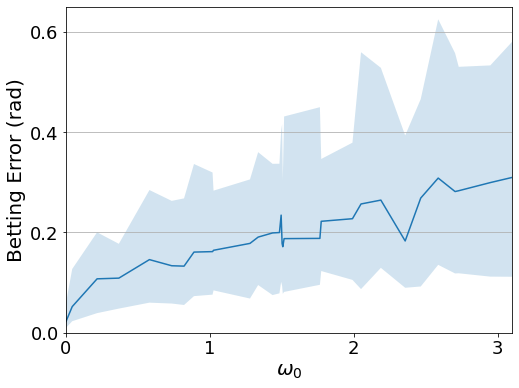

In [62]:
position = df_roulette_all.groupby('numtrial').first()['omegainitabs']
medianprops = dict(linestyle='-.', linewidth=2.5)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 18})
fig1, ax1 = plt.subplots(figsize=(8,6))
# df_roulette_all.plot.scatter(x='omegainitabs',y='bettingerror',ax=ax1,alpha=0.2)
# _=ax1.boxplot(df_roulette_all['bettingerror'].values.reshape(num_qual,35), positions=position, widths=0.05*np.ones((35,)),
#              medianprops=medianprops, showfliers=False, meanline=False)
plt.xticks(np.arange(0,4.1,1),('0','1','2','3','4'))
plt.yticks(np.arange(0,0.85,0.2))
plt.xlim((0,3.1))
_=plt.ylim((0,0.65))
_=plt.ylabel('Betting Error (rad)',fontsize=20)
_=plt.xlabel('$\omega_0$',fontsize=20)
_=plt.grid(axis='y')


position = np.array(position)
position = position[5:]

position_ind = np.argsort(position)
position_new = np.sort(position)
dat = df_roulette_all['bettingerror'].values.reshape(num_qual,35)
dat = dat[:,5:]
dat = dat[:,position_ind]

median1 = np.median(dat,axis=0)
std1 = np.std(dat, axis=0)
upper = np.quantile(dat, 0.75, axis=0)
lower = np.quantile(dat, 0.25, axis=0)
plt.plot(position_new, median1)
plt.fill_between(position_new, lower, upper, alpha=0.2)
plt.savefig('BettingErr_Omegainit.pdf', transparent=True)  

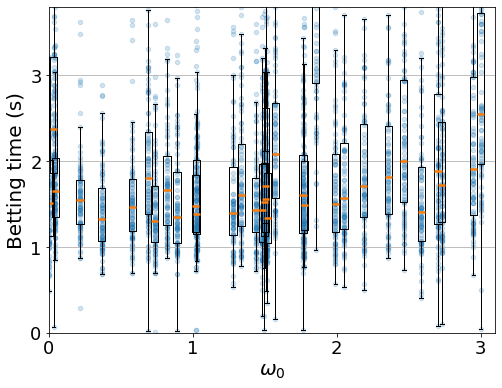

In [62]:
position = df_roulette_all.groupby('numtrial').first()['omegainitabs']
medianprops = dict(linestyle='-.', linewidth=2.5)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 18})
fig1, ax1 = plt.subplots(figsize=(8,6))
df_roulette_all.plot.scatter(x='omegainitabs',y='time',ax=ax1,alpha=0.2)
_=ax1.boxplot(df_roulette_all['time'].values.reshape(num_qual,35), positions=position, widths=0.05*np.ones((35,)),
             medianprops=medianprops, showfliers=False, meanline=False)
plt.xticks(np.arange(0,4.1,1),('0','1','2','3','4'))
plt.yticks(np.arange(0,4,1))
plt.xlim((0,3.1))
plt.ylim((0,3.8))
_=plt.ylabel('Betting time (s)',fontsize=20)
_=plt.xlabel('$\omega_0$',fontsize=20)
_=plt.grid(axis='y')
plt.savefig('BettingTime_Omegainit.pdf', transparent=True)  

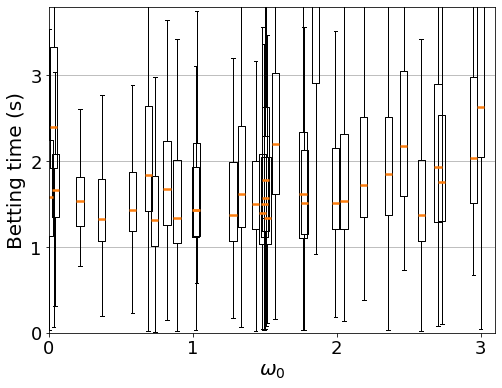

In [184]:
position = df_roulette_all.groupby('numtrial').first()['omegainitabs']
medianprops = dict(linestyle='-.', linewidth=2.5)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 18})
fig1, ax1 = plt.subplots(figsize=(8,6))
# df_roulette_all.plot.scatter(x='omegainitabs',y='time',ax=ax1,alpha=0.2)
_=ax1.boxplot(df_roulette_all['time'].values.reshape(num_qual,35), positions=position, widths=0.05*np.ones((35,)),
             medianprops=medianprops, showfliers=False, meanline=False)
plt.xticks(np.arange(0,4.1,1),('0','1','2','3','4'))
plt.yticks(np.arange(0,4,1))
plt.xlim((0,3.1))
plt.ylim((0,3.8))
_=plt.ylabel('Betting time (s)',fontsize=20)
_=plt.xlabel('$\omega_0$',fontsize=20)
_=plt.grid(axis='y')
plt.savefig('BettingTime_Omegainit.pdf', transparent=True)  

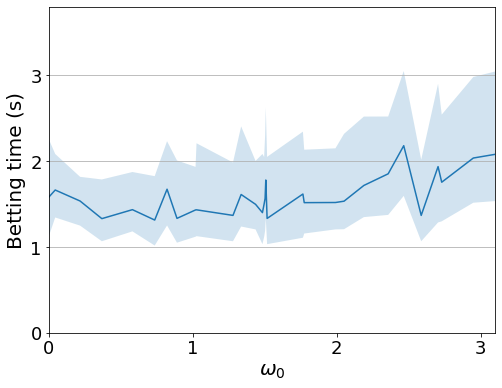

In [51]:
position = df_roulette_all.groupby('numtrial').first()['omegainitabs']
medianprops = dict(linestyle='-.', linewidth=2.5)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 18})
fig1, ax1 = plt.subplots(figsize=(8,6))
# df_roulette_all.plot.scatter(x='omegainitabs',y='time',ax=ax1,alpha=0.2)
# _=ax1.boxplot(df_roulette_all['time'].values.reshape(num_qual,35), positions=position, widths=0.05*np.ones((35,)),
#              medianprops=medianprops, showfliers=False, meanline=False)
plt.xticks(np.arange(0,4.1,1),('0','1','2','3','4'))
plt.yticks(np.arange(0,6,1))
plt.xlim((0,3.1))
plt.ylim((0,3.8))
_=plt.ylabel('Betting time (s)',fontsize=20)
_=plt.xlabel('$\omega_0$',fontsize=20)
_=plt.grid(axis='y')

position = np.array(position)
position = position[5:]

position_ind = np.argsort(position)
position_new = np.sort(position)
dat = df_roulette_all['time'].values.reshape(num_qual,35)
dat = dat[:,5:]
dat = dat[:,position_ind]

median1 = np.median(dat,axis=0)
std1 = np.std(dat, axis=0)
upper = np.quantile(dat, 0.75, axis=0)
lower = np.quantile(dat, 0.25, axis=0)
plt.plot(position_new, median1)
plt.fill_between(position_new, lower, upper, alpha=0.2)
plt.savefig('BettingTime_Omegainit.pdf', transparent=True)  

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


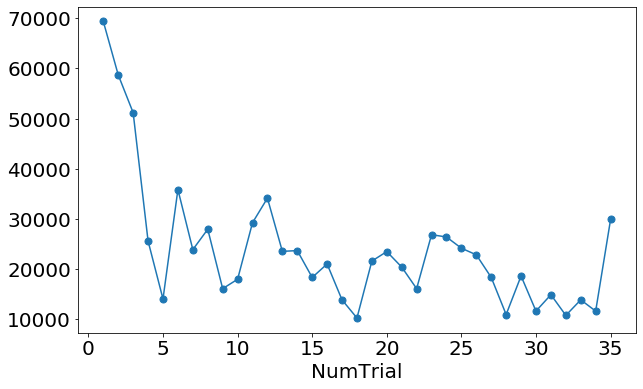

In [63]:
fig, ax = plt.subplots(figsize=(10,6))
yy =df_roulette_all.groupby('numtrial').std()['timeratio']
ax.plot(range(1,36), yy, marker='o', linestyle='-', ms=7, 
                label=name)
ax.set_xlabel('NumTrial',fontsize=20)
ax.set_ylabel('',fontsize=20)#  / $\omega_0$
ax.tick_params(axis='both', which='major', labelsize=20)

### Average reward of each game

(0, 800)

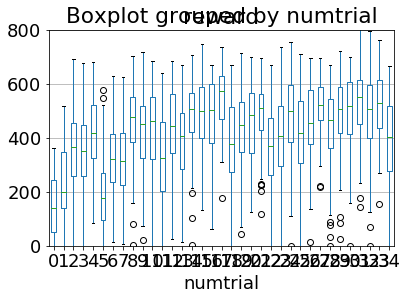

In [64]:
ax = df_roulette_all.boxplot(column='reward',by='numtrial')
ax.xaxis.grid(False)
ax.set_ylim(0,800)

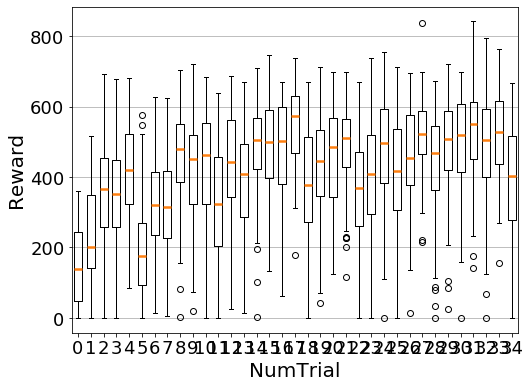

In [65]:
position = range(35)#df_roulette_all.groupby('numtrial').mean()['omegainitabs']#.sort_values()
medianprops = dict(linestyle='-.', linewidth=2.5)
fig1, ax1 = plt.subplots(figsize=(8,6))
_=ax1.boxplot(df_roulette_all['reward'].values.reshape(num_qual,35), positions=position, widths=0.62*np.ones((35,)),
             medianprops=medianprops)
# _=plt.xticks(np.arange(0,6,1),('0','1','2','3','4','5','6'))
# _=plt.xlim((-3.5,3.5))
# _=plt.ylim((-3,3))
_=plt.ylabel('Reward',fontsize=20)
_=plt.xlabel('NumTrial',fontsize=20)
_=plt.grid(axis='y')

### Reward vs numtrial for each user

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5, 1.0, 'f8c26f28')

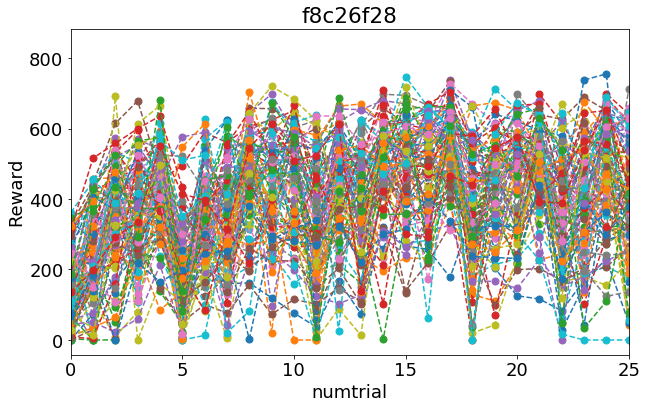

In [66]:
fig, ax = plt.subplots(figsize=(10,6))
groups = df_roulette_all.groupby('username')
for name, group in groups:
        usedname = name
        ax.plot(group.numtrial, group.reward, marker='o', linestyle='--', ms=7, 
                label=name)
#ax.legend(numpoints=1)
# ax.set_ylim(0,4)
ax.set_xlim(0,25)
ax.set_xlabel('numtrial')
ax.set_ylabel('Reward')
# ax.legend(['Bet_time','Best_time','Omega_0'])
ax.set_title(usedname)

(array([1., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
        1., 1., 0., 0., 3., 0., 2., 2., 3., 0., 1., 1., 1., 2., 0., 0., 1.,
        1., 1., 2., 3., 1., 1., 2., 4., 0., 1., 3., 1., 2., 2., 1., 1., 3.,
        3., 1., 1., 4., 0., 4., 2., 1., 2., 2., 0., 0., 3., 2., 0., 2., 1.,
        0., 2., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.]),
 array([164.95495604, 169.65937278, 174.36378952, 179.06820626,
        183.772623  , 188.47703974, 193.18145648, 197.88587321,
        202.59028995, 207.29470669, 211.99912343, 216.70354017,
        221.40795691, 226.11237364, 230.81679038, 235.52120712,
        240.22562386, 244.9300406 , 249.63445734, 254.33887408,
        259.04329081, 263.74770755, 268.45212429, 273.15654103,
        277.86095777, 282.56537451, 287.26979125, 291.97420798,
        296.67862472, 301.38304146, 306.0874582 , 310.79187494,
        315.49629168, 320.20070841, 32

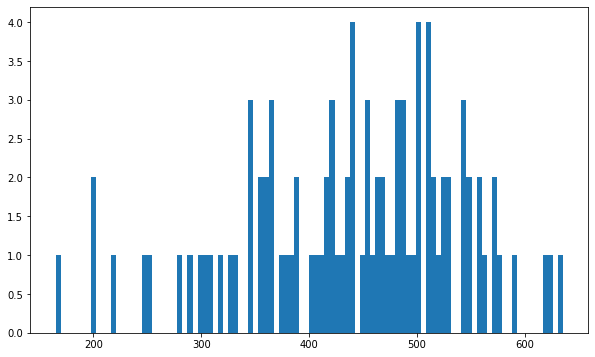

In [63]:
fig, ax = plt.subplots(figsize=(10,6))
groups = df_roulette_all.groupby('username')
medLst = []
for name, group in groups:
        usedname = name
        medLst.append(group.reward.median())
        if group.reward.median() < 100:
            print(name)
plt.hist(medLst,bins=100)

### Reward vs best possible reward

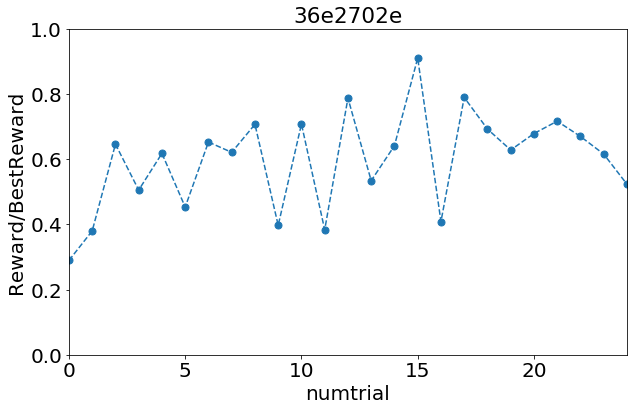

In [67]:
fig, ax = plt.subplots(figsize=(10,6))
groups = df_roulette_all.groupby('username')
t = 0
for name, group in groups:
    if t==13:
        usedname = name
        ax.plot(group.numtrial, group.reward / group.best_reward, marker='o', linestyle='--', ms=7, 
                label=name)
    t = t+1
ax.set_ylim(0,1)
ax.set_xlim(0,24)
ax.set_xlabel('numtrial',fontsize=20)
ax.set_ylabel('Reward/BestReward',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title(usedname)
fig.savefig('Plots/RewardRatio_User'+usedname+'.pdf')

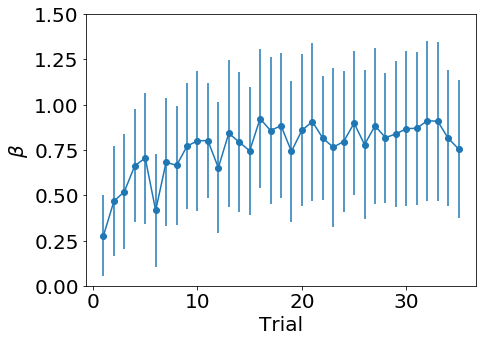

In [75]:
fig, ax = plt.subplots(figsize=(7,5))
# xx=df_roulette_all.groupby('numtrial').mean()['time'][:25]
yy =df_roulette_all.groupby('numtrial').mean()['rewardratio']
e =df_roulette_all.groupby('numtrial').std()['rewardratio']
# yy2=df_roulette_all.groupby('numtrial').mean()['best_time'][:25]
#ax.plot(range(1,36), yy, marker='o', linestyle='-', ms=7, 
#                label=name)
ax.errorbar(range(1,36), yy, yerr=e, fmt='o',linestyle='-')
#ax.errorbar(range(1,36), yy, e, linestyle='None', marker='^')
#ax.legend(numpoints=1)
ax.set_ylim(0,1.5)
# ax.set_xlim(0,25)
ax.set_xlabel('Trial',fontsize=20)
ax.set_ylabel(r'$\beta$',fontsize=20)#  / $\omega_0$
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend(['Bet_time','Best_time','Omega_0'])
#fig.savefig('Plots/RewardRatio.pdf')

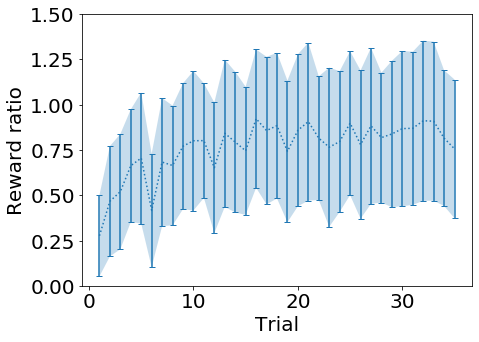

In [50]:
fig, ax = plt.subplots(figsize=(7,5))
yy =df_roulette_all.groupby('numtrial').mean()['rewardratio']
e =df_roulette_all.groupby('numtrial').std()['rewardratio']
ax.set_ylim(0,1.5)
# ax.set_xlim(0,25)
ax.errorbar(range(1,36), yy, yerr=e, fmt=':', capsize=3, capthick=1)
ax.fill_between(range(1,36), yy-e, yy+e, alpha=0.25)
ax.set_xlabel('Trial',fontsize=20)
ax.set_ylabel('Reward ratio',fontsize=20)#  / $\omega_0$
ax.tick_params(axis='both', which='major', labelsize=20)
fig.savefig('Plots/RewardRatio.pdf')

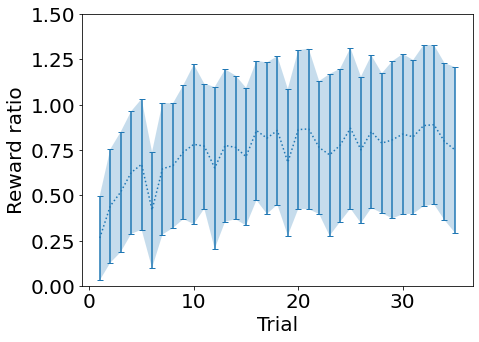

In [172]:
fig, ax = plt.subplots(figsize=(7,5))
yy =df_roulette_all.groupby('numtrial').mean()['rewardratio']
e =df_roulette_all.groupby('numtrial').std()['rewardratio']
ax.set_ylim(0,1.5)
# ax.set_xlim(0,25)
ax.errorbar(range(1,36), yy, yerr=e, fmt=':', capsize=3, capthick=1)
ax.fill_between(range(1,36), yy-e, yy+e, alpha=0.25)
ax.set_xlabel('Trial',fontsize=20)
ax.set_ylabel('Reward ratio',fontsize=20)#  / $\omega_0$
ax.tick_params(axis='both', which='major', labelsize=20)
fig.savefig('Plots/RewardRatio.pdf')

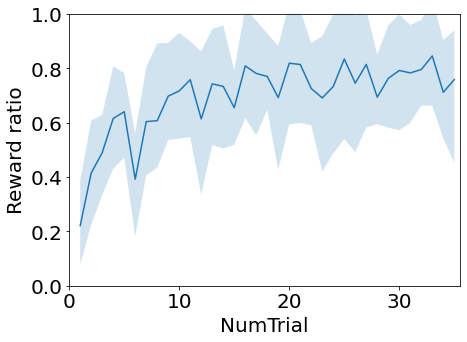

In [76]:
fig, ax = plt.subplots(figsize=(7,5))
yy =df_roulette_all.groupby('numtrial').mean()['rewardratio']
e =df_roulette_all.groupby('numtrial').std()['rewardratio']
ax.set_ylim(0,1)
ax.set_xlim(0,35.5)
# plt.yticks(np.arange(0,6,2))

median1 = df_roulette_all.groupby('numtrial').median()['rewardratio']
upper = df_roulette_all.groupby('numtrial').quantile(0.75)['rewardratio']
lower = df_roulette_all.groupby('numtrial').quantile(0.25)['rewardratio']
plt.plot(range(1,36), median1)
plt.fill_between(range(1,36), lower, upper, alpha=0.2)

# ax.fill_between(range(1,36), yy-e, yy+e, alpha=0.25)
ax.set_xlabel('NumTrial',fontsize=20)
ax.set_ylabel('Reward ratio',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend(['Bet_time','Best_time','Omega_0'])
fig.savefig('Plots/RewardRatioVsNumTrial.pdf')

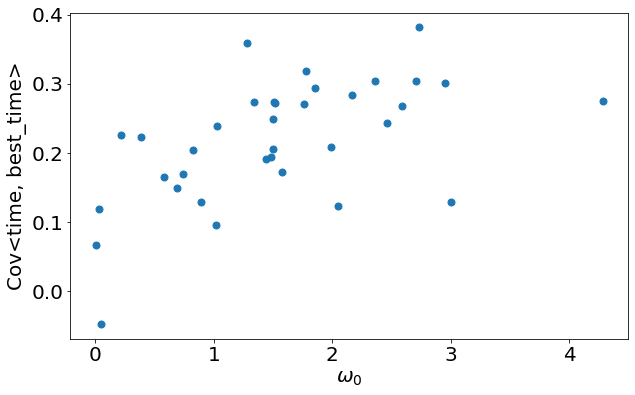

In [66]:
bt = df_roulette_all['best_time'].values.reshape(num_qual,35)
tt = df_roulette_all['time'].values.reshape(num_qual,35)
allr = [pearsonr(tt[:,j],bt[:,j])[0] for j in range(35)]
fig, ax = plt.subplots(figsize=(10,6))
# xx=df_roulette_all.groupby('numtrial').mean()['time'][:25]

# yy =df_roulette_all.groupby('numtrial').mean()['rewardratio']
x =df_roulette_all.groupby('numtrial').mean()['omegainitabs']
# yy2=df_roulette_all.groupby('numtrial').mean()['best_time'][:25]
ax.plot(x, allr, marker='o', linestyle='', ms=7, 
                label=name)
# ax.errorbar(range(1,36), yy, e, linestyle='None', marker='^')
#ax.legend(numpoints=1)
# ax.set_ylim(0,1)
# ax.set_xlim(0,25)
ax.set_xlabel('$\omega_0$',fontsize=20)
ax.set_ylabel('Cov<time, best_time>',fontsize=20)#  / $\omega_0$
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend(['Bet_time','Best_time','Omega_0'])
# fig.savefig('Plots/TimeDifferenceVsNumTrial.pdf')

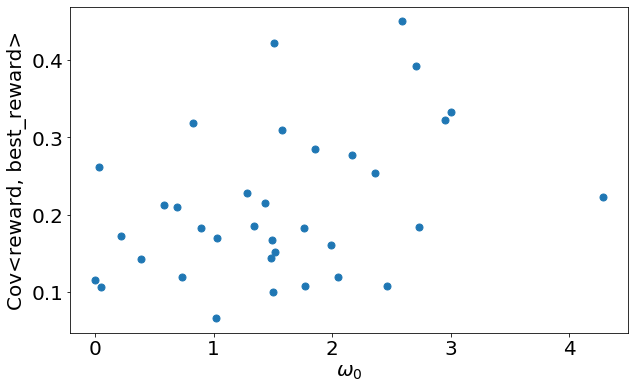

In [67]:
bt = df_roulette_all['reward'].values.reshape(num_qual,35)
tt = df_roulette_all['best_reward'].values.reshape(num_qual,35)
allr = [pearsonr(tt[:,j],bt[:,j])[0] for j in range(35)]
fig, ax = plt.subplots(figsize=(10,6))
# xx=df_roulette_all.groupby('numtrial').mean()['time'][:25]

# yy =df_roulette_all.groupby('numtrial').mean()['rewardratio']
x =df_roulette_all.groupby('numtrial').mean()['omegainitabs']
# yy2=df_roulette_all.groupby('numtrial').mean()['best_time'][:25]
ax.plot(x, allr, marker='o', linestyle='', ms=7, 
                label=name)
# ax.errorbar(range(1,36), yy, e, linestyle='None', marker='^')
#ax.legend(numpoints=1)
# ax.set_ylim(0,1)
# ax.set_xlim(0,25)
ax.set_xlabel('$\omega_0$',fontsize=20)
ax.set_ylabel('Cov<reward, best_reward>',fontsize=20)#  / $\omega_0$
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend(['Bet_time','Best_time','Omega_0'])
# fig.savefig('Plots/TimeDifferenceVsNumTrial.pdf')

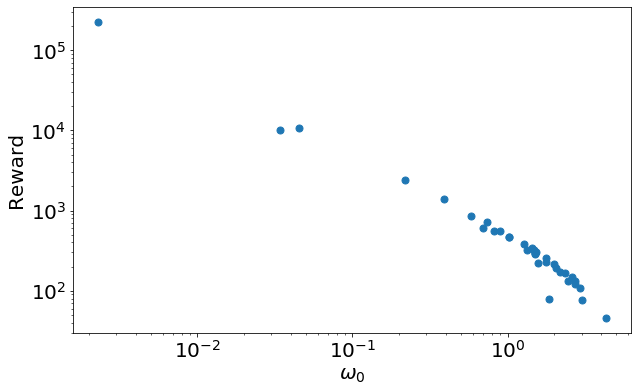

In [68]:
fig, ax = plt.subplots(figsize=(10,6))
xx=df_roulette_all.groupby('numtrial').mean()['omegainitabs']
yy=df_roulette_all.groupby('numtrial').mean()['reward']
ax.plot(xx, yy/xx, marker='o', linestyle='', ms=7, 
                label=name)

#ax.legend(numpoints=1)
# ax.set_ylim(0,2)
# ax.set_xlim(0,25)
# ax.set_xlabel('$\omega_0$',fontsize=20)
ax.set_xlabel('$\omega_0$',fontsize=20)
ax.set_ylabel('Reward',fontsize=20)#  / $\omega_0$
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend(['Bet_time','Best_time','Omega_0'])
# fig.savefig('Plots/RewardRatioVsNumTrial.pdf')

### All speed-accuracy data colored by user

Text(0, 0.5, 'Betting error')

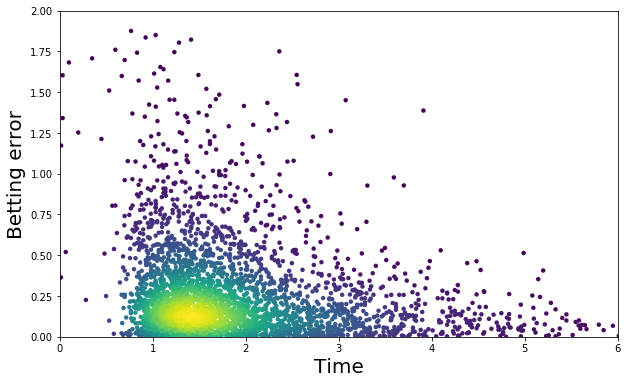

In [69]:

x = df_roulette_all.time.tolist()
y = df_roulette_all.bettingerror.tolist()
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x, y, c=z, s=20, edgecolor='')
ax.set_xlim(0,6)
ax.set_ylim(0,2)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Betting error',fontsize=20)

Text(0, 0.5, 'Error')

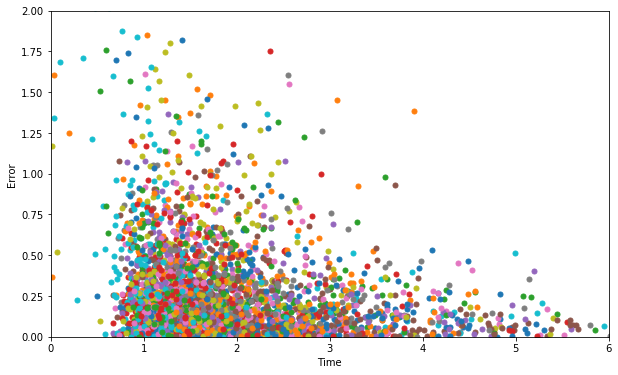

In [70]:
fig, ax = plt.subplots(figsize=(10,6))
groups = df_roulette_all.groupby('username')
for name, group in groups:
    ax.plot(group.time, group.bettingerror, marker='o', linestyle='', ms=5, 
            label=name)
#ax.legend(numpoints=1)
ax.set_ylim(0,2)
ax.set_xlim(0,6)
ax.set_xlabel('Time')
ax.set_ylabel('Error')

### Speed and error grouped by user

In [25]:
def rewardf(t, err):
    return 1000*(1.5**(-t))*(np.cos(err/2.)**10.)

In [26]:
x = np.linspace(0, 4, 20)
y = np.linspace(0, 0.7, 20)

X, Y = np.meshgrid(x, y)
Z = rewardf(X, Y)

<ipython-input-45-47acd6c3d5bc>:20: RuntimeWarning: divide by zero encountered in true_divide
  errt = 0.2/xt**2


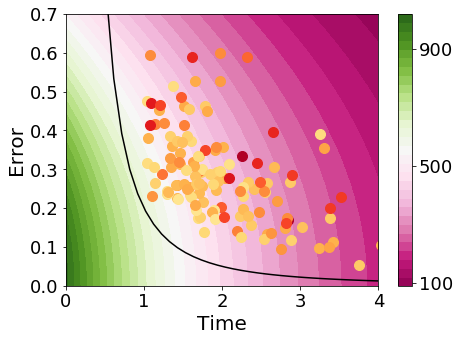

In [45]:
cm = plt.get_cmap('YlOrRd')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 18})
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(7,5))
ccc = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
groups = df_roulette_all.groupby('username')
for name, group in groups:
    if name=="67d26e6a":
        continue
#    markersize = df_angle_all[df_angle_all['username']==name]['angleerrormean'].tolist()
    markersize = 0.2*np.ones(np.size(df_angle_all[df_angle_all['username']==name]['angleerrormean'].tolist()))
    markercolor = df_speed_all[df_speed_all['username']==name]['speederrormean'].tolist()
#     print(name, markersize[0])
    ax.plot(group['bettingtimemean'].tolist()[0], group['bettingerrormean'].tolist()[0], marker='o', linestyle='', ms=markersize[0]*50, 
            label=name, color=ccc[min(39,int(markercolor[0]*40))])
xt = np.linspace(0, 5, 50)
errt = 0.2/xt**2
ax.plot(xt, errt, color="black")  
#ax.legend(numpoints=1)
ax.set_ylim(0,0.7)
ax.set_xlim(0,4)
ax.set_xlabel('Time',fontsize=20)
ax.set_ylabel('Error',fontsize=20)
contourf_ = ax.contourf(X, Y, Z, 30, cmap='PiYG')
cbar = fig.colorbar(contourf_,ticks=[100,500,900])
#cbar.set_clim(0, 1000)
fig.savefig('Plots/ErrorBetTimeContourCbar.pdf')

In [38]:
np.min(df_speed_all['speederrormean'].tolist())

0.1047197551196578

In [39]:
np.max(df_speed_all['speederrormean'].tolist())

2.921681167838519

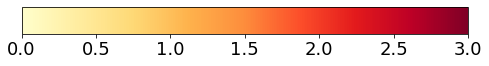

In [43]:
fig, ax = plt.subplots(figsize=(8,0.5))
norm = mpl.colors.Normalize(vmin=0, vmax=3.0)
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cm, norm=norm,ticks=[0,0.5,1.0,1.5,2.0,2.5,3.0],
                                orientation='horizontal')

/anaconda2/envs/ipykernal_py3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


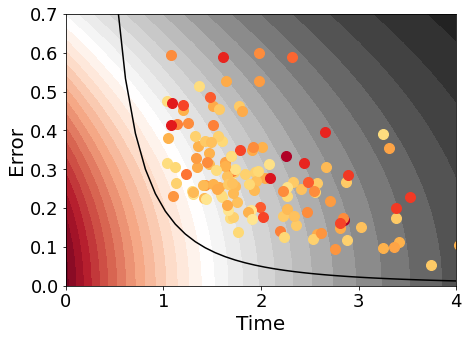

In [173]:
cm = plt.get_cmap('YlOrRd')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 18})
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(7,5))
ccc = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
groups = df_roulette_all.groupby('username')
for name, group in groups:
    if name=="67d26e6a":
        continue
#    markersize = df_angle_all[df_angle_all['username']==name]['angleerrormean'].tolist()
    markersize = 0.2*np.ones(np.size(df_angle_all[df_angle_all['username']==name]['angleerrormean'].tolist()))
    markercolor = df_speed_all[df_speed_all['username']==name]['speederrormean'].tolist()
#     print(name, markersize[0])
    ax.plot(group['bettingtimemean'].tolist()[0], group['bettingerrormean'].tolist()[0], marker='o', linestyle='', ms=markersize[0]*50, 
            label=name, color=ccc[min(39,int(markercolor[0]*40))])
xt = np.linspace(0, 5, 50)
errt = 0.2/xt**2
ax.plot(xt, errt, color="black")  
#ax.legend(numpoints=1)
ax.set_ylim(0,0.7)
ax.set_xlim(0,4)
ax.set_xlabel('Time',fontsize=20)
ax.set_ylabel('Error',fontsize=20)
ax.contourf(X, Y, Z, 30, cmap='RdGy_r')
fig.savefig('Plots/ErrorBetTimeContour.pdf')

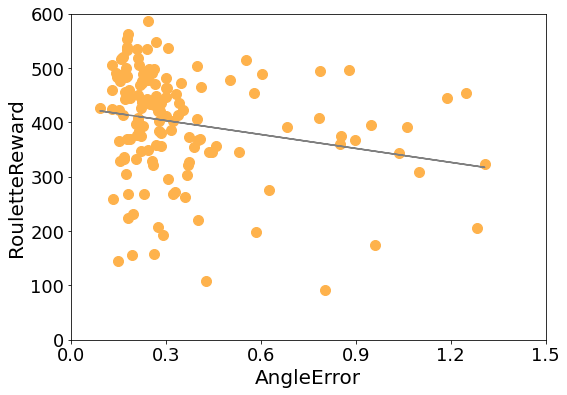

In [29]:
cm = plt.get_cmap('YlOrRd')
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(8.5,6))
ccc = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
groups = df_roulette_all.groupby('username')
xlist = np.array([])
ylist = np.array([])
for name, group in groups:
    angleerror = df_angle_all[df_angle_all['username']==name]['angleerrormean'].tolist()[0]
    speederror = df_speed_all[df_speed_all['username']==name]['speederrormean'].tolist()[0]
    x = angleerror
    y = group.mean()['reward']
    ax.plot(x, y, marker='o', linestyle='', ms=10, 
            label=name, color=ccc[15])
    xlist = np.append(xlist, x)
    ylist = np.append(ylist, y)

m, b = np.polyfit(xlist, ylist, 1)
ax.plot(xlist, m*xlist + b, color=[0.5,0.5,0.5])
ax.set_ylim(0,600)
ax.set_xlim(0,1.5)
ax.set_xticks([0,0.3,0.6,0.9,1.2,1.5])
ax.set_xlabel('AngleError',fontsize=20)
ax.set_ylabel('RouletteReward',fontsize=20)
plt.savefig('RRew_AngErr.pdf', transparent=True) 

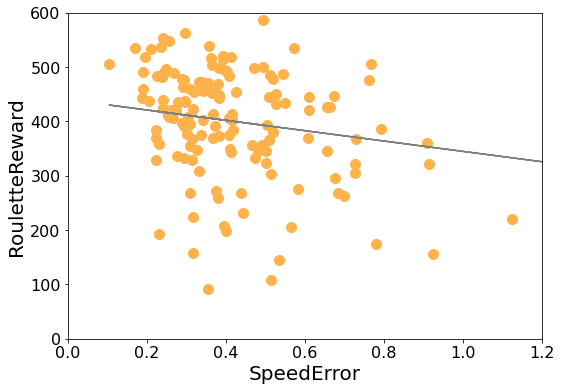

In [30]:
cm = plt.get_cmap('YlOrRd')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams.update({'font.size': 16})
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(8.5,6))
ccc = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
groups = df_roulette_all.groupby('username')
xlist = np.array([])
ylist = np.array([])
for name, group in groups:
    angleerror = df_angle_all[df_angle_all['username']==name]['angleerrormean'].tolist()[0]
    speederror = df_speed_all[df_speed_all['username']==name]['speederrormean'].tolist()[0]
    ax.plot(speederror, group.mean()['reward'], marker='o', linestyle='', ms=10, 
            label=name, color=ccc[15])
    xlist = np.append(xlist, speederror)
    ylist = np.append(ylist, group.mean()['reward'])

m, b = np.polyfit(xlist, ylist, 1)
ax.plot(xlist, m*xlist + b, color=[0.5,0.5,0.5])

ax.set_ylim(0,600)
ax.set_xlim(0,1.2)
ax.set_xlabel('SpeedError',fontsize=20)
ax.set_ylabel('RouletteReward',fontsize=20)
plt.savefig('RRew_SpdErr.pdf', transparent=True) 

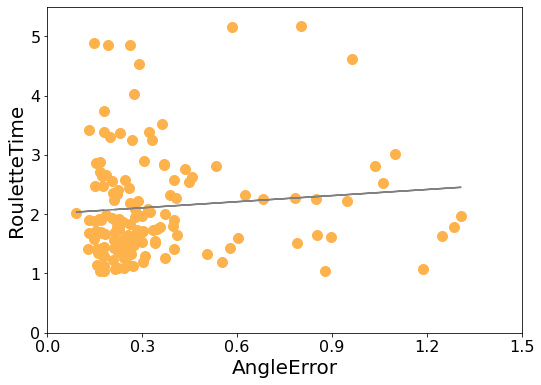

In [31]:
cm = plt.get_cmap('YlOrRd')
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(8.5,6))
ccc = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
groups = df_roulette_all.groupby('username')
xlist = np.array([])
ylist = np.array([])
for name, group in groups:
    angleerror = df_angle_all[df_angle_all['username']==name]['angleerrormean'].tolist()[0]
    speederror = df_speed_all[df_speed_all['username']==name]['speederrormean'].tolist()[0]
    x = angleerror
    y = group['bettingtimemean'].tolist()[0]
    ax.plot(x, y, marker='o', linestyle='', ms=10, label=name, color=ccc[15])
    xlist = np.append(xlist, x)
    ylist = np.append(ylist, y)

m, b = np.polyfit(xlist, ylist, 1)
ax.plot(xlist, m*xlist + b, color=[0.5,0.5,0.5])

ax.set_ylim(0,5.5)
ax.set_xlim(0,1.5)
ax.set_xlabel('AngleError',fontsize=20)
ax.set_xticks([0,0.3,0.6,0.9,1.2,1.5])
ax.set_ylabel('RouletteTime',fontsize=20)
plt.savefig('RTime_AngErr.pdf', transparent=True) 

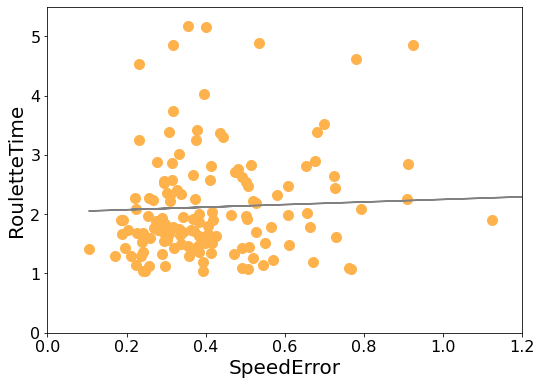

In [32]:
cm = plt.get_cmap('YlOrRd')
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(8.5,6))
ccc = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
groups = df_roulette_all.groupby('username')
xlist = np.array([])
ylist = np.array([])
for name, group in groups:
    angleerror = df_angle_all[df_angle_all['username']==name]['angleerrormean'].tolist()[0]
    speederror = df_speed_all[df_speed_all['username']==name]['speederrormean'].tolist()[0]
    x = speederror
    y = group['bettingtimemean'].tolist()[0]
    ax.plot(x, y, marker='o', linestyle='', ms=10, 
            label=name, color=ccc[15])
    xlist = np.append(xlist, x)
    ylist = np.append(ylist, y)

m, b = np.polyfit(xlist, ylist, 1)
ax.plot(xlist, m*xlist + b, color=[0.5,0.5,0.5])

ax.set_ylim(0,5.5)
ax.set_xlim(0,1.2)
ax.set_xlabel('SpeedError',fontsize=20)
ax.set_ylabel('RouletteTime',fontsize=20)
plt.savefig('RTime_SpdErr.pdf', transparent=True) 

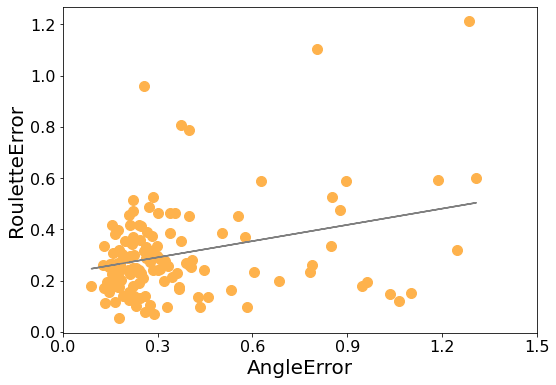

In [33]:
cm = plt.get_cmap('YlOrRd')
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(8.5,6))
ccc = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
groups = df_roulette_all.groupby('username')
xlist = np.array([])
ylist = np.array([])
for name, group in groups:
    angleerror = df_angle_all[df_angle_all['username']==name]['angleerrormean'].tolist()[0]
    speederror = df_speed_all[df_speed_all['username']==name]['speederrormean'].tolist()[0]
    x = angleerror
    y = group['bettingerrormean'].tolist()[0]
    ax.plot(x, y, marker='o', linestyle='', ms=10, 
            label=name, color=ccc[15])
    xlist = np.append(xlist, x)
    ylist = np.append(ylist, y)

m, b = np.polyfit(xlist, ylist, 1)
ax.plot(xlist, m*xlist + b, color=[0.5,0.5,0.5])


# ax.set_ylim(0,600)
ax.set_xlim(0,1.5)
ax.set_xticks([0,0.3,0.6,0.9,1.2,1.5])
ax.set_xlabel('AngleError',fontsize=20)
ax.set_ylabel('RouletteError',fontsize=20)
plt.savefig('RErr_AngErr.pdf', transparent=True) 

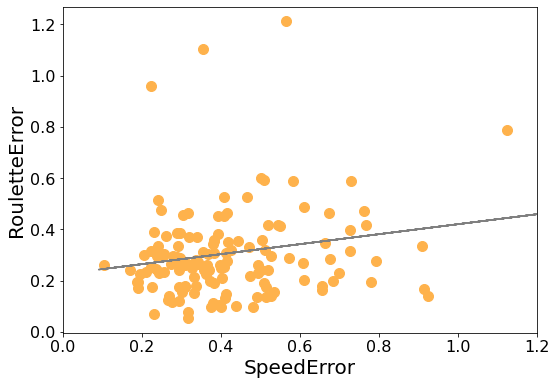

In [34]:
cm = plt.get_cmap('YlOrRd')
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)
NUM_COLORS=40
fig, ax = plt.subplots(figsize=(8.5,6))
ccc = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
groups = df_roulette_all.groupby('username')
for name, group in groups:
    angleerror = df_angle_all[df_angle_all['username']==name]['angleerrormean'].tolist()[0]
    speederror = df_speed_all[df_speed_all['username']==name]['speederrormean'].tolist()[0]
    x = speederror
    y = group['bettingerrormean'].tolist()[0]
    ax.plot(x, y, marker='o', linestyle='', ms=10, 
            label=name, color=ccc[15])

    xlist = np.append(xlist, x)
    ylist = np.append(ylist, y)

m, b = np.polyfit(xlist, ylist, 1)
ax.plot(xlist, m*xlist + b, color=[0.5,0.5,0.5])
ax.set_xlim(0,1.2)
ax.set_xlabel('SpeedError',fontsize=20)
ax.set_ylabel('RouletteError',fontsize=20)
plt.savefig('RErr_SpdErr.pdf', transparent=True) 

Text(0, 0.5, 'Error')

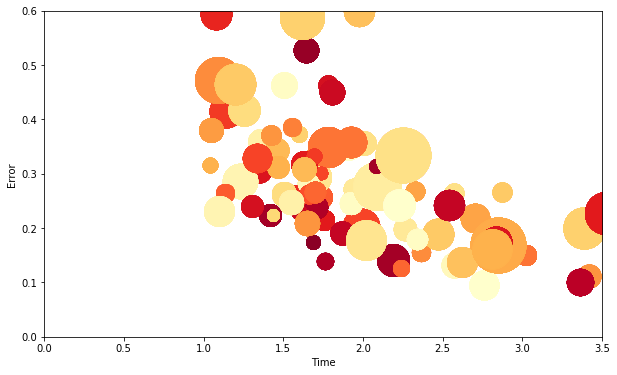

In [80]:
fig, ax = plt.subplots(figsize=(10,6))
groups = df_roulette_all.groupby('username')
ax.set_prop_cycle(color=[cm(np.mod(11.*i,40)/NUM_COLORS) for i in range(NUM_COLORS)])
for name, group in groups:
    markersize = df_speed_all[df_speed_all['username']==name]['speederrormean'].tolist()
    ax.plot(group.bettingtimemean, group.bettingerrormean, marker='o', linestyle='', ms=markersize[0]*60, 
            label=name)
#ax.legend(numpoints=1)
ax.set_ylim(0,0.6)
ax.set_xlim(0,3.5)
ax.set_xlabel('Time')
ax.set_ylabel('Error')

Text(0, 0.5, 'Error')

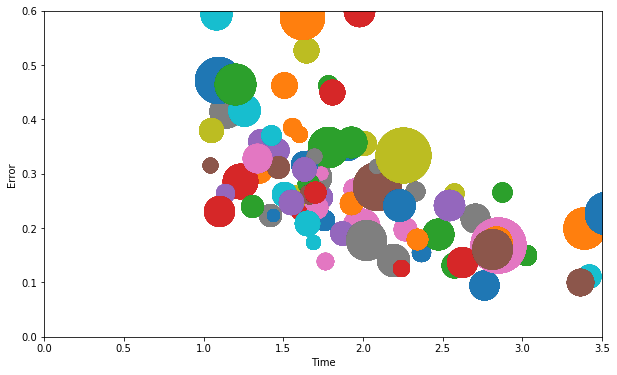

In [81]:
fig, ax = plt.subplots(figsize=(10,6))
groups = df_roulette_all.groupby('username')
for name, group in groups:
    markersize = df_speed_all[df_speed_all['username']==name]['speederrormean'].tolist()
    ax.plot(group.bettingtimemean, group.bettingerrormean, marker='o', linestyle='', ms=markersize[0]*60, 
            label=name)
#ax.legend(numpoints=1)
ax.set_ylim(0,0.6)
ax.set_xlim(0,3.5)
ax.set_xlabel('Time')
ax.set_ylabel('Error')

## Find disqualified players

In [41]:
df_speed_all

omegainit  omegafinal       time  speederror  speederrorabs  \
0     -0.767945   -0.994838   7.880509    0.226893       0.226893   
1     -2.460914   -1.658063   7.363950   -0.802851       0.802851   
2      3.438299    5.166175   9.779801    1.727876       1.727876   
3      1.727876    0.820305   6.214458   -0.907571       0.907571   
4     -2.042035   -3.577925  20.209352    1.535890       1.535890   
...         ...         ...        ...         ...            ...   
2169  -2.268928   -1.500983   5.233240   -0.767945       0.767945   
2170   0.959931   -0.994838   4.066579    0.034907       0.034907   
2171  -0.226893   -0.139626   4.500036   -0.087266       0.087266   
2172   2.879793    4.101524   6.466898    1.221730       1.221730   
2173  -1.483530   -2.234021   3.733189    0.750492       0.750492   

      speederrorsq  numtrial  omegainitabs  speederrormean  username  \
0         0.051480         0      0.767945        0.520108  daa26e48   
1         0.644570         1      2.460914        0.520108  daa26e48   
2         2.985555         2      3.438299        0.520108  daa26e48   
3         0.823686         3      1.727876        0.520108  daa26e48   
4         2.358957         4      2.042035        0.520108  daa26e48   
...            ...       ...           ...             ...       ...   
2169      0.589739        10      2.268928        0.510800  fca2e9c8   
2170      0.001218        11      0.959931        0.510800  fca2e9c8   
2171      0.007615        12      0.226893        0.510800  fca2e9c8   
2172      1.492625        13      2.879793        0.510800  fca2e9c8   
2173      0.563238        14      1.483530        0.510800  fca2e9c8   

        lambda  speederrorvar   Domegam  
0     0.579750       0.267071  1.154554  
1     0.579750       0.267071  1.154554  
2     0.579750       0.267071  1.154554  
3     0.579750       0.267071  1.154554  
4     0.579750       0.267071  1.154554  
...        ...            ...       ...  
2169  0.556549       0.211816  0.839125  
2170  0.556549       0.211816  0.839125  
2171  0.556549       0.211816  0.839125  
2172  0.556549       0.211816  0.839125  
2173  0.556549       0.211816  0.839125  

[2174 rows x 13 columns]

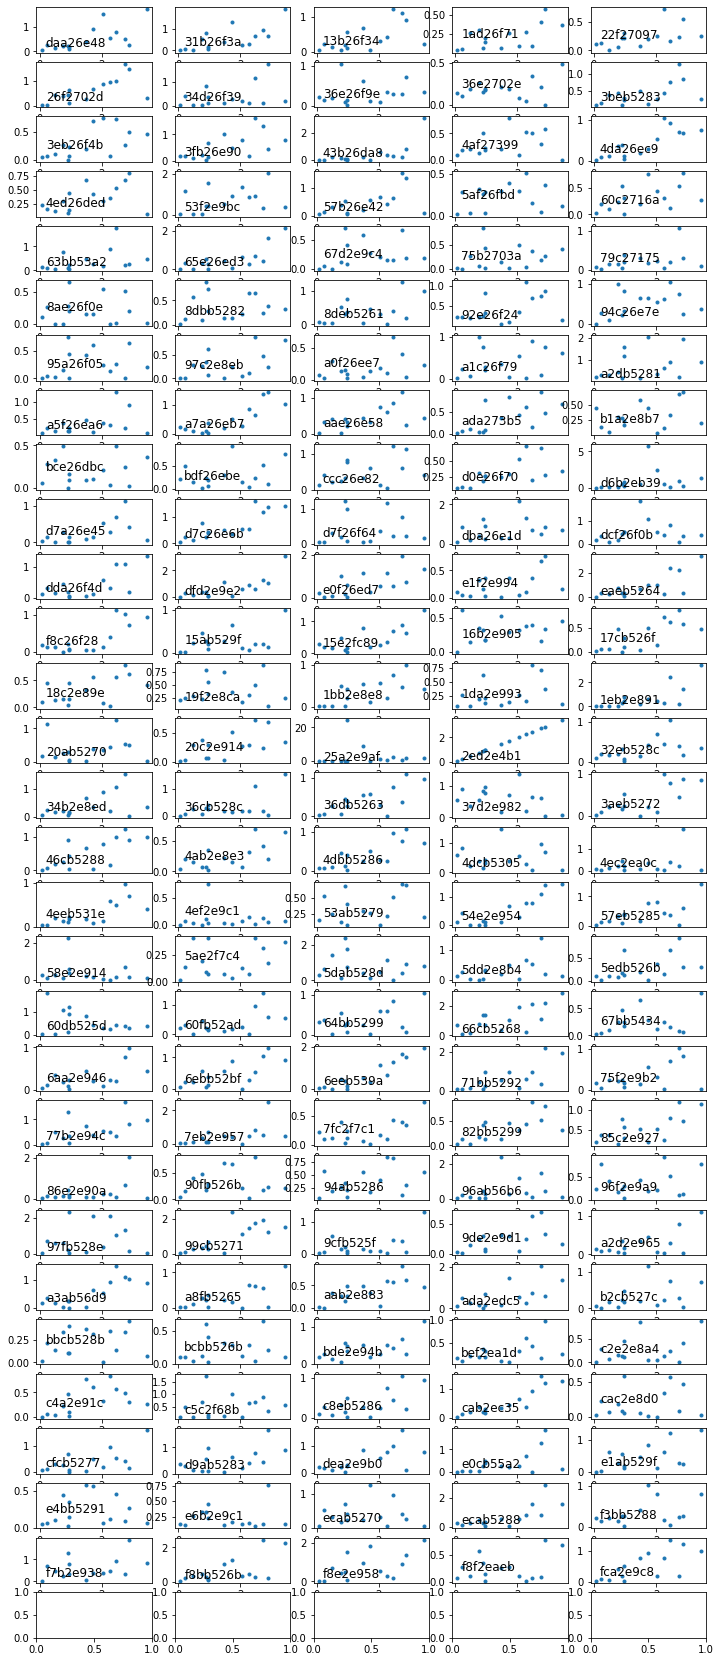

In [52]:
fig, axs = plt.subplots(30,5, figsize=(12,30))
z = 0
for user in Qual_users:
    df_speed = df_speed_all[df_speed_all.username==user]
    axs[z//5, z%5].plot(df_speed.omegainitabs, df_speed.speederrorabs,'.')
    axs[z//5, z%5].text(0.2, 0.2, user, fontsize=12)
    z+=1
    